<a href="https://colab.research.google.com/github/Segrey372017/gb_python_datascience_libs_p2/blob/main/ssmirnov_python_dslibs2_termpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()


### 0. Домашняя работа к Уроку 4

<ol>
<li>Расскажите, как работает регуляризация в решающих деревьях, какие параметры мы штрафуем в данных алгоритмах? </li>
<li>По какому принципу рассчитывается "важность признака (feature_importance)" в ансамблях деревьев? </li>
<li>Прикрепите ссылку на курсовой проект.</li>
<li>Укажите, пожалуйста, ваш ник на kaggle.</li>
</ol>

<h3> Задание 1 </h3>
<p>Регуляризация в моделях машинного обучения позволяет боротсь с переобучением, когда модель вместо поиска закономерностей в данных стремится "запомнить" каждый экзепляр тренировочных данных. Или сойтись к универсальному ответу: выдать одинаковые метки всем экземплярам как у наиболее частотного класса, или наборот всем экземлпяры метки наиболее редкого. Или часто в случае регрессии в качестве проноза выдать значение предыдущего экземлпяра данных. </p>
<p> В решающих деревьяв функции регуляризации не дают "расти" в ширь (использовать в качестве признаков все тренировочные данные) и в "глубину" (проводить бесконечное число сравнений, подстраиваясь под тренировочные данные). Вместо содержательных сравнений признаков поучается путь от конкретного значения тренировчных данных до соотвествующего тренировчноо результата.</p> 
<p> Соответственно решающие деревья штрафуются за излишнюю глубину max_depth, (depth), излишнее ветвление (количество листьев) max_leaf, количество деревьев n_estimators. Моделях градиентного бустинга регуляризацией управляет параметр l2_leaf_reg, который штрафует модель за чрезмерное разрастание деревьев.</p>
<br>
<h3> Задание 2 </h3>
<p>Важность признака обределяется тем насколько часто данный признак встречается в листьях деревьев. Ели из признаков А и Б в деревьях при сравнениях чаще используются значения признака А то его вашность выше чем у Б. Если признак не задействован в решающем дереве, то он не оказывает влияния на данную модель, соответственно у него нулевая значимость.</p> <br>

<h3> Задание 3 </h3>
Ник на Kaggle: SV_Smirnov<br>

<h3> Задание 4 </h3>
<p> Ссылка на курсовой <a href = "https://github.com/Segrey372017/gb_python_datascience_libs_p2/blob/main/ssmirnov_python_dslibs2_termpaper.ipynb">проект </a> </p>

<h1>Курсованя работа на тему: Решение задачи классификации. Предсказание возможности дефолта по займу (<a href = "https://www.kaggle.com/t/629f0f9238324b9d819d26838be92544">Credit Default</a>)</h1>

# 1. Загрузка и предобработка данных

In [ ]:
# ссылки на набор данных
# тренировочный набор данных
train_data_link = 'https://raw.githubusercontent.com/Segrey372017/gb_python_datascience_libs_p2/main/train.csv'

#тестовый набор данных
test_data_link = 'https://raw.githubusercontent.com/Segrey372017/gb_python_datascience_libs_p2/main/test.csv'

# пример ответа 
submission_link = r'https://raw.githubusercontent.com/Segrey372017/gb_python_datascience_libs_p2/main/sample_submission.csv'

In [ ]:
# создание датафрейма с тренировочным набором данных
data = pd.read_csv(train_data_link)

In [ ]:
data.head() # проверка загрузки

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Набор данных содержит 7500 записей, имеется 15 признкаов: 4 - признака являются категориальными, 11 - числовые. В наборе данных имеются пропуски.

In [ ]:
# отберем количественные значения
num_cols = data.dtypes[data.dtypes != 'object'].index.values.tolist()
target_col = num_cols.pop(-1) # колонка с тагертом
num_cols

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [ ]:
# отберем качественные признаки
cat_cols = data.dtypes[data.dtypes == 'object'].index.values.tolist()
cat_cols

['Home Ownership', 'Years in current job', 'Purpose', 'Term']

## 1.1. Обработка количественных признаков

In [ ]:
# Выведем описательную статистику по количестенным признакам
data[num_cols].describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000


In [ ]:
# определим количество пропущенных значений в %
data[num_cols].isna().mean(axis = 0)*100

Annual Income                   20.760000
Tax Liens                        0.000000
Number of Open Accounts          0.000000
Years of Credit History          0.000000
Maximum Open Credit              0.000000
Number of Credit Problems        0.000000
Months since last delinquent    54.413333
Bankruptcies                     0.186667
Current Loan Amount              0.000000
Current Credit Balance           0.000000
Monthly Debt                     0.000000
Credit Score                    20.760000
dtype: float64

Рассмотрим описательную статистику количественных признаков: <br>

_Annual Income (Годовой доход)_ - количество значений 5943, соответственно пропущено 20,7% значений. Минимальные и максимальные значения соответсвуют реалистичным значениям, у признака имеются выбросы так как среднее значение 1 366 392 смещено правее медианного 1 168 386. Признак непрерывный.<br>

_Tax Liens (Налоговые обременения)_ - данные заполнены без пропусков, минимальное значение 0 (платежи отсутствуют) максимальное значение 7, значению изменяются в очень малом диапазоне среднее и медианные значения близки к 0. Признак дискретный.<br>

_Number of Open Accounts (Количество открытых счетов)_ - данные заполнены без пропусков, минимальное значение 2, максимальное 43, при среднем значении 11 и медианном 10 свидетельствует о наличии выбросов. Признак дискретный.<br>

_Years of Credit History (Количество лет кредитной истории)_ - Данные без пропусков, минимальное значение 4, максимальное 57, при среднем значении 18.3, медианное составляет 17. Влияние выбросов незначительно, данные реалистичны - соответствуют возрасту заемщика. Признак можно характеризовать как непрерывный<br>

_Maximum Open Credit_(Наибольший открытый кредит) - данные без пропусков, Минимальное значение 0, максимальное значение порядка 130 млн. Среднее значение составляет 945 тыс. при медианном 450 тыс., таким образом имеется смещение распределения в правую часть из-за редких экстремально больших значений. Признак непрерывный.<br>

_Number of Credit Problems (Количество проблем с кредитом) - данные без пропусков. Минимальное значение 0, максимальное значение 7, при среднем значении 0,17 медианное составило 0. Таким образом большинство заемщиков ведут себя добросовестно. Признак явяется дискретным. <br>

_Months since last delinquent (Rоличество месяцев с последней просрочки платежа)_- Большая часть данный по признаку 54% не заполнена (поскольку основная часть заемщиков ведет себя добросовестно). Минимальное значение составляет 0, максимальное 118 месяцев, среднее значение составляет 34 месяца, медианное 32. На распределение признака оказывают выбросы (редкие больше значения). Необходимо разработать стратегию для обработки пропущенных значений.<br>

_Bankruptcies (Банкротства)_ - признак имеет 0.19% пропущенных значений. Максимальное значение составляет 4 случая, минимальное 0. Среднее значение составляет 0,12 при медианном значении 0. Имеется смещение распределения вправо. Признак дискретный.<br>

_Current Loan Amount (Текущая сумма кредита)_ - Пропуски отсутствуют. Максимальное значение составляет 100 млн. минимальное 11 тыс. Среднее значение 11 миллионов, при медианном значении 309 тыс. Распределение признака имеет значительное смещение из-за "выбросов". Признак непрерывный. <br>

_Current Credit Balance (Текущий кредитный баланс)_ - Пропущенные значения отсутствуют, Максимальное значение составляет 6,5 млн., минимальное 0, среднее значение составляет 290 тысяч, при медианном значении 209 тыс. - влияние выбросов незначительно. Признак непрерывный. <br>

_Monthly Debt (Ежемесячный долг)_ - Пропущенные значения отсутствуют. Максимальное значение 137 тысяч, минимальное 0, среднее значение составляет 18 тысяч, при медианном уровне 16 тысяч, имеется небольше смещение распределения признака вправо. Признак непрерывный. <br>

_Credit Score (Баллы кредитного рейтинга)_ - Имеется значительное количеств пропусков 20,7%. Поскольку количество пропусков полностью совпадает с призноком Annual Income, вероятно иммено от этого признака рассчитывается кредитный рейтинг. Максимальное значение рейтинга составляет 7510 баллов, минимальное 585, среднее значение составляет 1151 балл, медианное 731 балл, таким образом, распределение подвержено влиянию выбросов. Признак можно считать непрерывным. К сожалению отсутствует информацию о методике расчета рейтинга, что затрудняет анализ признака. Наихудьший сценарий, если баллы рейтинга являются рангами заемщика (порядковым номером места) среди всех заещиков - самый надежный 1 место самый неплатежеспсобный 7510.

In [ ]:
d_data = data[num_cols].dropna(axis = 0) # создадим датафрейм с удаленными пропусками
d_data.shape

(2724, 12)

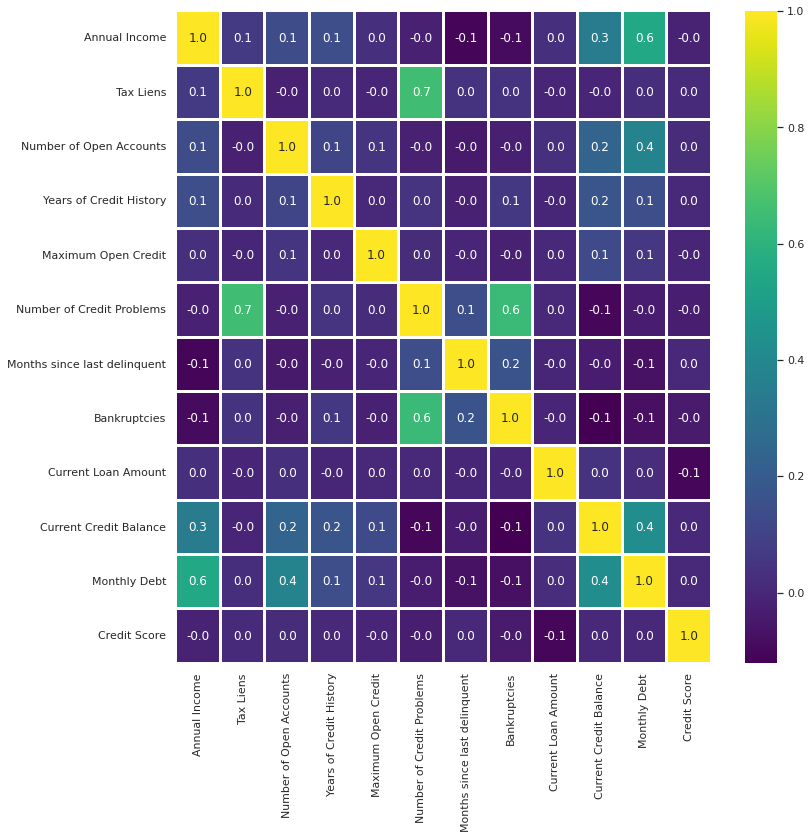

In [ ]:
plt.figure(figsize = (12,12)) # выведем матрицу корреляций числовых признаков
sns.heatmap(data = d_data.corr(), annot = True, fmt = '.1f', linewidths = 2, cmap = 'viridis')
plt.show()

Признак Annual_Income имеет значимую положительную коррелящию с признаком Monthly Debt (0,6), пропуский в последнем отутствуют. У признака Credit Score корреляция с другими числовыми признаками отсутствует. Воспользуемся найденной корреляцией чтобы заполнить остутствующие данные по Annual_Income линейной регрессией

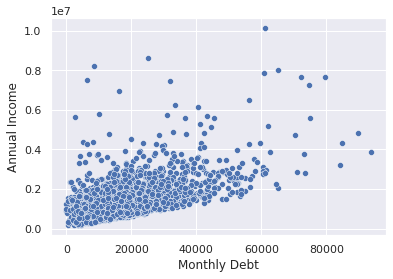

In [ ]:
sns.scatterplot(data = d_data, x = 'Monthly Debt', y = 'Annual Income')

In [ ]:
# Обучим модель линейной регресии
from sklearn.linear_model import LinearRegression

In [ ]:
l_reg = LinearRegression()

In [ ]:
l_reg.fit(d_data['Monthly Debt'].values.reshape(-1,1), d_data['Annual Income'])

LinearRegression()

In [ ]:
y_income = l_reg.predict(d_data['Monthly Debt'].values.reshape(-1,1))

In [ ]:
l_reg.score(d_data['Monthly Debt'].values.reshape(-1,1), d_data['Annual Income']) # поскольку модель является прямой линией переобучение вряд ли возникнет

0.30443487175097916

Text(0, 0.5, 'Рассчетные значения')

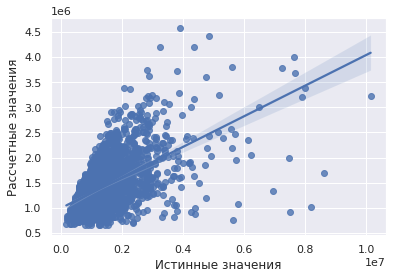

In [ ]:

sns.regplot(x = d_data['Annual Income'], y = y_income)
plt.xlabel('Истинные значения')
plt.ylabel('Рассчетные значения')

# Пусть коэффициент детерминации достаточно мал, такой подход позволит заполнить пропуски нетривиальными значениями

In [ ]:
# обработаем и заполним пропуски среди колличественных значений
# Annual Income
data['Annual_Income_NA'] = pd.Series(data=np.zeros(data.shape[0]), index = data.index)

In [ ]:
data.Annual_Income_NA.loc[data['Annual Income'].isna()] = 1
data.Annual_Income_NA.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0.0    5943
1.0    1557
Name: Annual_Income_NA, dtype: int64

In [ ]:
# Заполним отсутствующие значения медианными значениями. Поскольку заемщику мало
# смысла скрывать высокий доход, то для заемщиков с низкими или неподтвержденными
# доходами скорее всего доход будет близок к медианному (доход который обеспечиват приемлимый уровень жизни)
#data['Annual Income'].loc[data.Annual_Income_NA == 1] = data['Annual Income'].median()

# заполним пропуски значениями линейной регрессии
data['Annual Income'].loc[data.Annual_Income_NA ==1] = l_reg.predict(data['Monthly Debt'].loc[data.Annual_Income_NA == 1].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Сигнальный признак для признака 'Months since last delinquent'
data['Months_since_last_delinquent_NA'] = pd.Series(data = np.zeros(data.shape[0]),
                                                    index = data.index)

In [ ]:
data.Months_since_last_delinquent_NA.iloc[data['Months since last delinquent'].isna()] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Поскольку признак отражает наступление неплатежеспособности клиента, значения у добросовестных клиентов оказались незаплненными
Одной из  стратегий для обработки подобных пропусков является задание отсутствующим значениям
значения сильно отличающегося от имеющихся, тем самымым создавая хорошо отделимые кластеры  заемщиков.Gрисвоим прпущенным значениями (добросовестным) отрицательное значение -1.
При максимальном значении признака 118 данные значения должны быть хорошо различимы для любой модели

In [ ]:
data['Months since last delinquent'].loc[data.Months_since_last_delinquent_NA == 1] = -1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# конечно серьезным образом поменяются статистические характеристики признака
data['Months since last delinquent'].describe()

count    7500.000000
mean       15.271067
std        23.031689
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        29.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


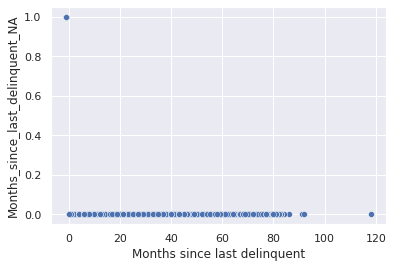

In [ ]:
sns.scatterplot(data['Months since last delinquent'], data['Months_since_last_delinquent_NA'])

In [ ]:
# Сигнальный признак для Bankruptcies
data['Bankruptcies_NA'] = pd.Series(data = np.zeros(data.shape[0]), index = data.index)

In [ ]:
# Ввиду малой доли пропущенных значений, будем считать что факт банкротства заемщика отсут
# ствует, значит заполняем нулевыми значениями
data.Bankruptcies_NA.loc[data.Bankruptcies.isna()] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data.Bankruptcies = data.Bankruptcies.fillna(value = 0)

In [ ]:
data.Bankruptcies.isna().value_counts()

False    7500
Name: Bankruptcies, dtype: int64

In [ ]:
# Сигнальный признак для Credit Score 
# проверим гипотезу об отсутствии кредитного рейтинга при отсутсвии сведений о доходах
data['Credit Score'].loc[data.Annual_Income_NA == 1]

5      NaN
8      NaN
9      NaN
10     NaN
16     NaN
        ..
7482   NaN
7492   NaN
7494   NaN
7498   NaN
7499   NaN
Name: Credit Score, Length: 1557, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


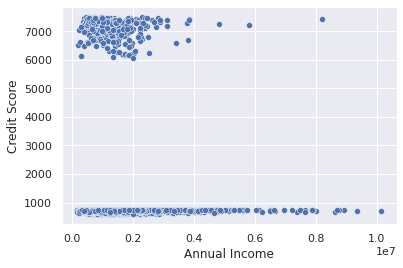

In [ ]:
# Похоже так и есть. Построим точечную диаграмму данных признаков
income = data['Annual Income'].loc[data.Annual_Income_NA == 0]
credit_score = data['Credit Score'].loc[data.Annual_Income_NA == 0]
sns.scatterplot(income, credit_score)

In [ ]:
np.corrcoef(income, credit_score)

array([[ 1.        , -0.03783175],
       [-0.03783175,  1.        ]])

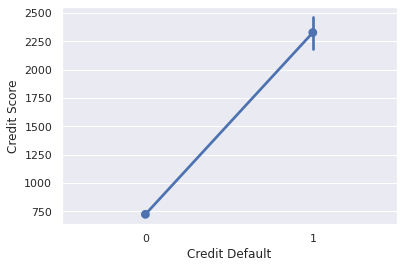

In [ ]:
sns.pointplot(data = data, x = target_col, y = 'Credit Score')

In [ ]:
data[[target_col, 'Monthly Debt','Annual Income']].loc[data['Credit Score'].isna()].groupby(target_col).mean()

,Monthly Debt,Annual Income
Credit Default,,
0,18170.897860,1.412833e+06
1,18995.637051,1.447496e+06


In [ ]:
del income, credit_score 
# значимая линейная зависимость между признаками отсутствует, таким образом, попробуем
# также заменть отсутствующие значения медианными
## заменим отсутствующие значению 0 (нулевыми значениями рейтинга)
data['Credit_Score_NA'] = pd.Series(data = np.zeros(data.shape[0]),
                                    index = data.index)

In [ ]:
data.Credit_Score_NA.loc[data['Credit Score'].isna()] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#data['Credit Score'].loc[data.Credit_Score_NA == 1] = data['Credit Score'].median()
data['Credit Score'].loc[data.Credit_Score_NA == 1] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


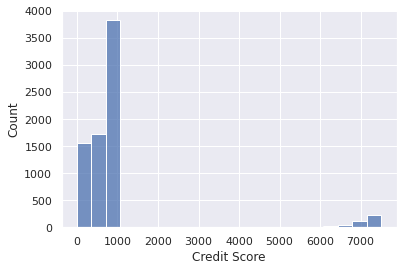

In [ ]:
sns.histplot(data['Credit Score'], bins = 21)

In [ ]:
data['Credit Score'].value_counts() #  довольно сильные выбросы из-за клиентов с экстремальным значением рейтинга

0.0       1557
740.0      169
747.0      168
748.0      157
745.0      152
          ... 
602.0        1
616.0        1
585.0        1
620.0        1
7010.0       1
Name: Credit Score, Length: 269, dtype: int64

In [ ]:
# Проверим замены
data[num_cols].isna().mean(axis = 0)*100

Annual Income                   0.0
Tax Liens                       0.0
Number of Open Accounts         0.0
Years of Credit History         0.0
Maximum Open Credit             0.0
Number of Credit Problems       0.0
Months since last delinquent    0.0
Bankruptcies                    0.0
Current Loan Amount             0.0
Current Credit Balance          0.0
Monthly Debt                    0.0
Credit Score                    0.0
dtype: float64

## 1.2. Обработка категориальных признаков

In [ ]:
# определеим колличество пропущенных значений
data[cat_cols].isna().mean(axis = 0)*100

Home Ownership          0.000000
Years in current job    4.946667
Purpose                 0.000000
Term                    0.000000
dtype: float64

In [ ]:
# рассмотрим содержание каждой категории

for cat in cat_cols:
    print('='*30,cat,'='*30)
    print(data[cat].value_counts())
    print('\n')

============================== Home Ownership ==============================
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64


============================== Years in current job ==============================
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64


============================== Purpose ==============================
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   

_Home Ownership (Домовладение)_ - Пропуски отсутствуют. В признаке выделены 4 категории, наиболее частотная - Home mortage (Приобретен в ипотеку), наимее частотная (Сейчас в ипотеке). <br>

_Years in current job (Количество лет на текущем месте работы)_ - признак содержит 5% пропущенных значений. Выделено 11 категорий. Наиболее частотная "10+ years", наиболее редкая "9 years". Данный признак возможно содержит избыточное число категорий возможно его необходимо преобразовать в вещественный признак или сократить число категорий.<br>

_Purpose (Цель кредита)_ - Пропуски отсутствуют. Выделено 15 категорий, наиболее частотная категория "debt consolidation" (рефинансирование кредитов) т.е значительная часть заемщиков берет займ для погашения других задолженностей. Наименее частотная категория "renewable energy" (возобновляемая энергтика). В данном случае такеж избыточно число категорий, при том что одной из самых больших категорий является "other" (прочие).<br>

_Term (Cрок кредита)_ - Признак не содержит пропусков. Выделено всео две категории - краткосрочный займ и долгосрочный займ. Данный признак такеж целесообразно закодировать (0 или 1). <br>

In [ ]:
# Признак Home Ownership закодируем разреженными векторами 
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OneHot = OneHotEncoder() # инициализируем кодировщик так как тренировочный и тестовые данные содержатся в разных наборах

In [ ]:
HO_coded = OneHot.fit_transform(data['Home Ownership'].values.reshape(-1,1)).toarray()

In [ ]:
HO_coded.shape # форма совпадает

(7500, 4)

In [ ]:
HO_cats = data['Home Ownership'].value_counts().index.tolist() # Наименования будущих колонок (Категорий)
HO_cats

['Home Mortgage', 'Rent', 'Own Home', 'Have Mortgage']

In [ ]:
# добавляем закодированный признак в датафрейм
HO_coded = pd.DataFrame(data = HO_coded, index = data.index, columns = HO_cats) # создадим совместимый датафрейм
HO_coded

,Home Mortgage,Rent,Own Home,Have Mortgage
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
7495,0.0,0.0,0.0,1.0
7496,0.0,1.0,0.0,0.0
7497,0.0,0.0,0.0,1.0
7498,0.0,1.0,0.0,0.0


In [ ]:
data = pd.concat([data, HO_coded], axis = 1, join= 'inner') # сливаем набор данных
data

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Home Mortgage,Rent,Own Home,Have Mortgage
0,Own Home,4.820870e+05,NaN,0.0,11.0,26.3,685960.0,1.0,-1.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Own Home,1.025487e+06,10+ years,0.0,15.0,15.3,1181730.0,0.0,-1.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Home Mortgage,7.514120e+05,8 years,0.0,11.0,35.0,1182434.0,0.0,-1.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Own Home,8.050680e+05,6 years,0.0,8.0,22.5,147400.0,1.0,-1.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Rent,7.762640e+05,8 years,0.0,13.0,13.6,385836.0,1.0,-1.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,4.021920e+05,< 1 year,0.0,3.0,8.5,107866.0,0.0,-1.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7496,Home Mortgage,1.533984e+06,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7497,Rent,1.878910e+06,6 years,0.0,12.0,32.1,1778920.0,0.0,-1.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7498,Home Mortgage,2.209169e+06,NaN,0.0,21.0,26.5,1141250.0,0.0,-1.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Признак 'Years in current job' содержит около 5% пропущенных значений
# создадим сигнальный признак
data['Years_in_current_job_NA'] = pd.Series(data = np.zeros(data.shape[0]), index = data.index)

In [ ]:
data.Years_in_current_job_NA.loc[data['Years in current job'].isna()] = 1
data.Years_in_current_job_NA.value_counts(normalize= True) # проверим правильность заполнения

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0.0    0.950533
1.0    0.049467
Name: Years_in_current_job_NA, dtype: float64

In [ ]:
# Возможно наличие постоянного места работы и уровень годового дохода имеют тесную связь. Если она есть, то можно будет эффективно обработать пропущенные значения
data[['Annual Income', 'Years in current job']].groupby(by = 'Years in current job', dropna = False).mean()

,Annual Income
Years in current job,
1 year,1.276500e+06
10+ years,1.512106e+06
2 years,1.328972e+06
3 years,1.409391e+06
4 years,1.359801e+06
5 years,1.335593e+06
6 years,1.339403e+06
7 years,1.362899e+06
8 years,1.410338e+06


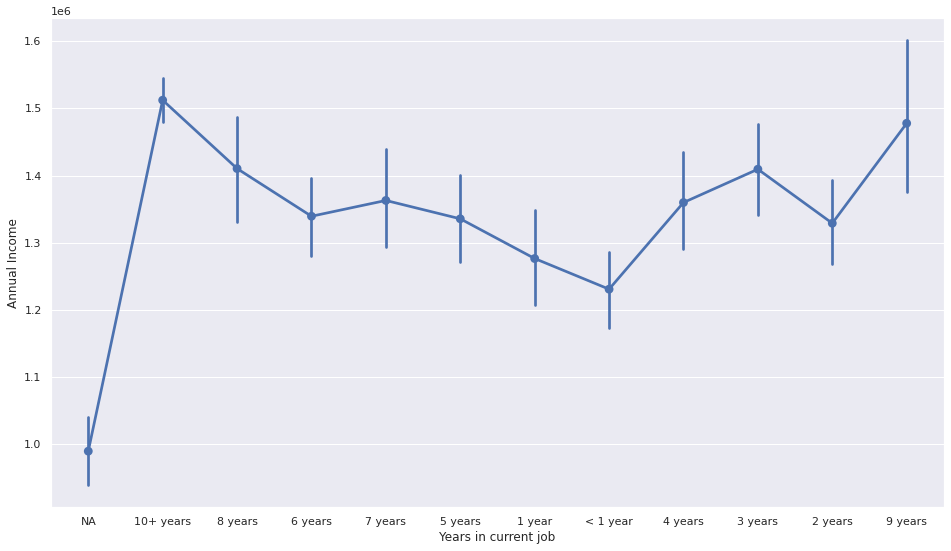

In [ ]:
# Пометим пропуски 
data['Years in current job'] = data['Years in current job'].fillna('NA')

# очевидно, клиенты с отсутствующими сведениями о работе в среднем имеют минимальный доход
plt.figure(figsize= (16,9))
sns.pointplot(x = 'Years in current job', y = 'Annual Income', data = data, )

In [ ]:
# Похоже клиненты с отсутствующими сведениями о занятости является отдельной категорией (скорее всего безработные, самозянятые, пенсионеры и т.п.), средний уровень дохода, 
# которых разительно отличается от иных категорий
# Используем явную положительную связь между занятостью (стажем работы) и уровнем дохода для кодирования данного признака 
job_cats = {'Years in current job': {'NA': -1,'< 1 year': 0, '1 year':1, '2 years':2, '3 years': 3, '4 years': 4, '5 years':5, '6 years':6, '7 years':7, 
                                     '8 years':8, '9 years':9, '10+ years':10}}

In [ ]:
# используем фунцию заменты в Pandas
data['Years_in_current_job_coded'] = data.replace(job_cats)['Years in current job']

In [ ]:
data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Home Mortgage,Rent,Own Home,Have Mortgage,Years_in_current_job_NA,Years_in_current_job_coded
0,Own Home,482087.0,NA,0.0,11.0,26.3,685960.0,1.0,-1.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,-1.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,-1.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,-1.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,-1.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8


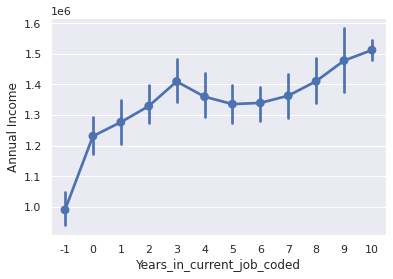

In [ ]:
# Выведем на график закодированные данные и годовой доход
sns.pointplot(x = 'Years_in_current_job_coded', y = 'Annual Income', data = data)

Теперь возможно использовать закодированный признак для моделей неспособных обрабатывать категориальные значения

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

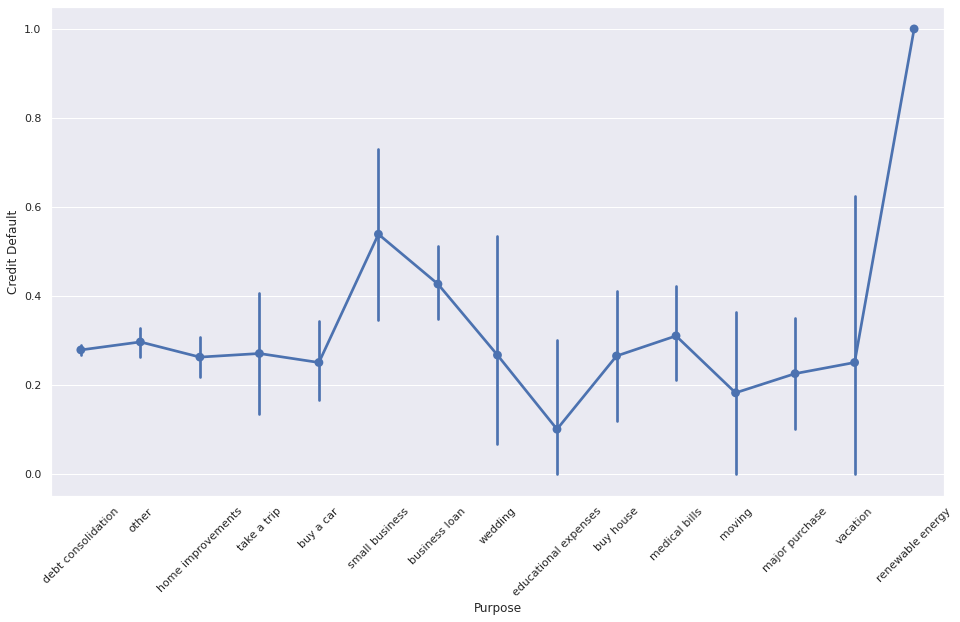

In [ ]:
# Рассмотрим признак Purpose, на первый взгляд он содержит избыточное число категорий, рассмотрим частотность целевой переменной в данном признаке
plt.figure(figsize = (16,9))
sns.pointplot(x = 'Purpose', y = target_col, data = data)
plt.xticks(rotation = 45)

In [ ]:
# ряд категорий имеют довольно близкие частоты и схожи по смыслу:
merged_cats = {'Purpose': {'take a trip': 'vacation', # путешествие и отпуск довольно близки по смыслу и частотам
                          'buy a car': 'major purchase', #  приобретение машины тоже можно считать "большой покупкой"
                          'home improvements': 'major purchase', #  тоже и про ремонт (улучшение) жилья
                          'small business': 'business loan', #  различные бизнес-цели и возобновляемую энергетику 
                          'renewable energy': 'business loan'} }  

# по частотам довольно схожи Wedding и Educational expenses (Свадьба и расходы на образование), но данные категории довольно далеки по смыслу

In [ ]:
# проведем замену
data['Purpose_merged'] = data.replace(merged_cats)['Purpose']


In [ ]:
data.Purpose_merged.value_counts()

debt consolidation      5944
other                    665
major purchase           548
business loan            157
medical bills             71
vacation                  45
buy house                 34
wedding                   15
moving                    11
educational expenses      10
Name: Purpose_merged, dtype: int64

In [ ]:
p_coder = OneHotEncoder()

In [ ]:
p_coded = p_coder.fit_transform(data.Purpose_merged.values.reshape(-1,1)).toarray()
p_coded.shape

(7500, 10)

In [ ]:
p_cats = list(*p_coder.categories_)
p_cats

['business loan',
 'buy house',
 'debt consolidation',
 'educational expenses',
 'major purchase',
 'medical bills',
 'moving',
 'other',
 'vacation',
 'wedding']

In [ ]:
p_coded = pd.DataFrame(data = p_coded, columns= p_cats, index= data.index)

In [ ]:
data = pd.concat([data, p_coded], axis=1, join = 'inner')

In [ ]:
data.tail()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Home Mortgage,Rent,Own Home,Have Mortgage,Years_in_current_job_NA,Years_in_current_job_coded,Purpose_merged,business loan,buy house,debt consolidation,educational expenses,major purchase,medical bills,moving,other,vacation,wedding
7495,Rent,4.021920e+05,< 1 year,0.0,3.0,8.5,107866.0,0.0,-1.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7496,Home Mortgage,1.533984e+06,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,Rent,1.878910e+06,6 years,0.0,12.0,32.1,1778920.0,0.0,-1.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,major purchase,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7498,Home Mortgage,2.209169e+06,NA,0.0,21.0,26.5,1141250.0,0.0,-1.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7499,Rent,1.029949e+06,4 years,0.0,8.0,9.4,480832.0,0.0,-1.0,0.0,debt consolidation,Short Term,26928.0,288192.0,9061.0,0.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Признак Term (срок кредита), имеет всего две категории, его т можно закодировать бинарными занчением 0 или 1
term_cat = {'Term': {'Short Term': 0, 'Long Term': 1 }}

In [ ]:
data['Term_coded'] = data.replace(term_cat)['Term']

In [ ]:
# Проверим замены
data.tail()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Home Mortgage,Rent,Own Home,Have Mortgage,Years_in_current_job_NA,Years_in_current_job_coded,Purpose_merged,business loan,buy house,debt consolidation,educational expenses,major purchase,medical bills,moving,other,vacation,wedding,Term_coded
7495,Rent,4.021920e+05,< 1 year,0.0,3.0,8.5,107866.0,0.0,-1.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7496,Home Mortgage,1.533984e+06,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7497,Rent,1.878910e+06,6 years,0.0,12.0,32.1,1778920.0,0.0,-1.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,major purchase,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7498,Home Mortgage,2.209169e+06,NA,0.0,21.0,26.5,1141250.0,0.0,-1.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7499,Rent,1.029949e+06,4 years,0.0,8.0,9.4,480832.0,0.0,-1.0,0.0,debt consolidation,Short Term,26928.0,288192.0,9061.0,0.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data.shape

(7500, 39)

# 2. Разведочный анализ данных (EDA)

### 2.1. Распределение целевого признака

In [ ]:
# Целевой признак Credit Default является категориальным (бинарным), пропущенные значения отсутствуют
cnt = data['Credit Default'].value_counts()
cnt

0    5387
1    2113
Name: Credit Default, dtype: int64

In [ ]:
data['Credit Default'].isna().mean()*100

0.0

In [ ]:
# Классы признака имеют явный дисбаланс - случая дефолтов должников относительно редки (на 1 дефолт приходится 2,55 случаем успешного погашения займа)
disbalance = cnt.values[0] / cnt.values[1]
disbalance

2.549455750118315

### 2.2. Анализ количественных признаков

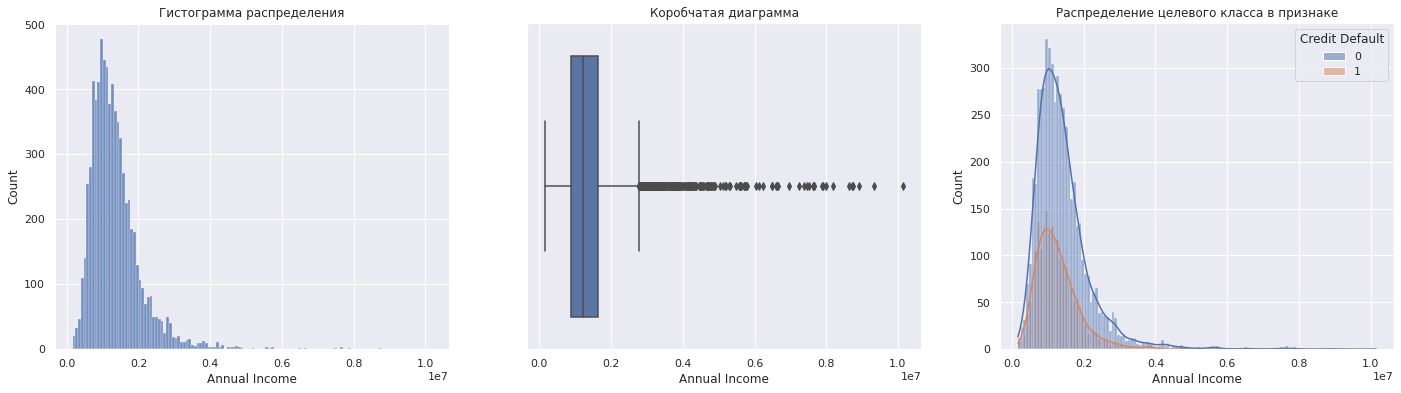

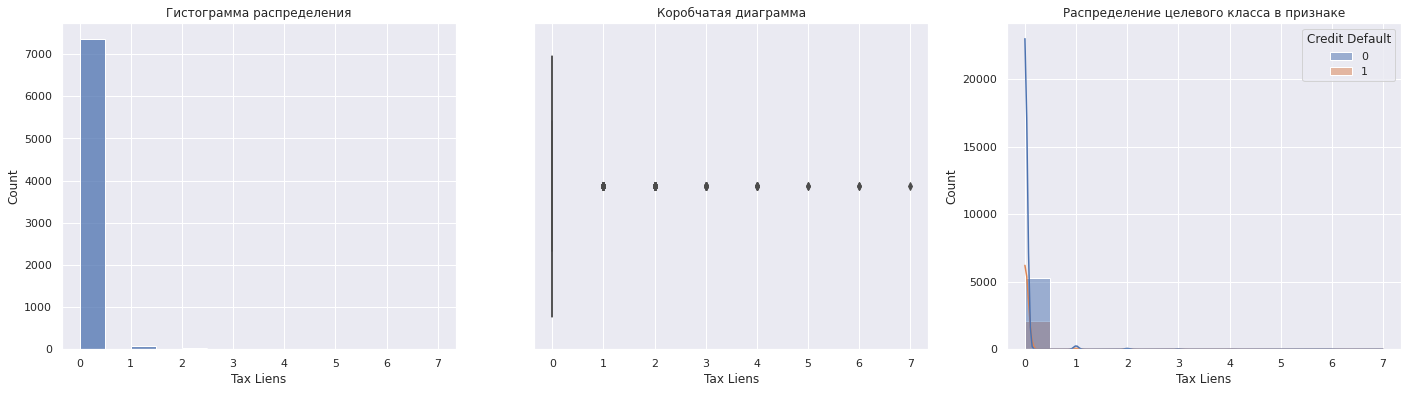

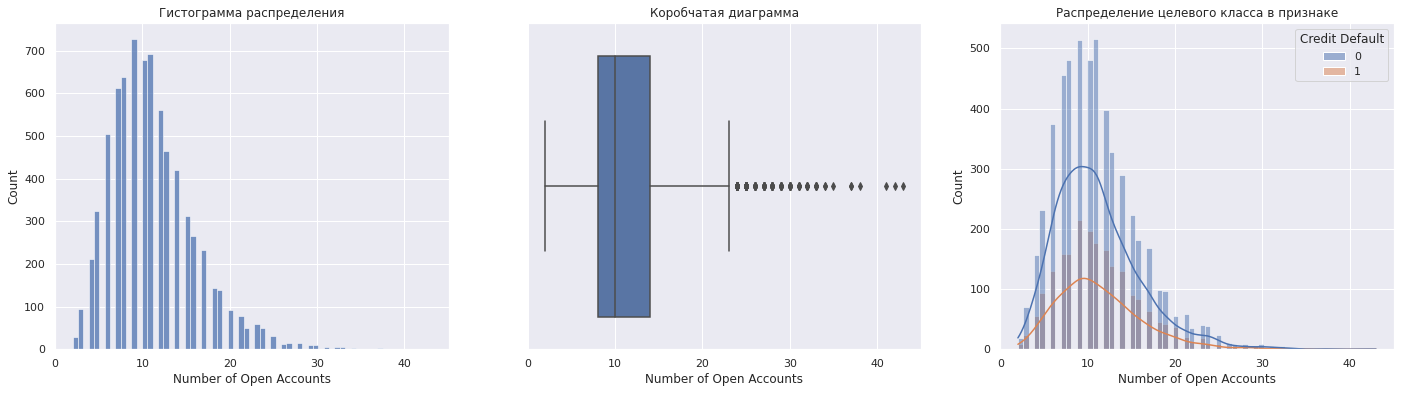

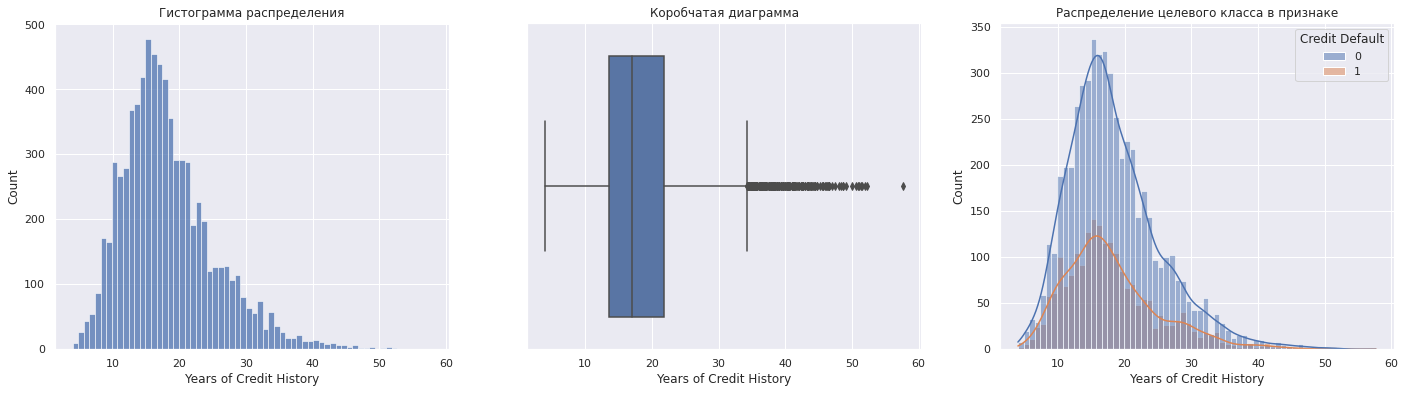

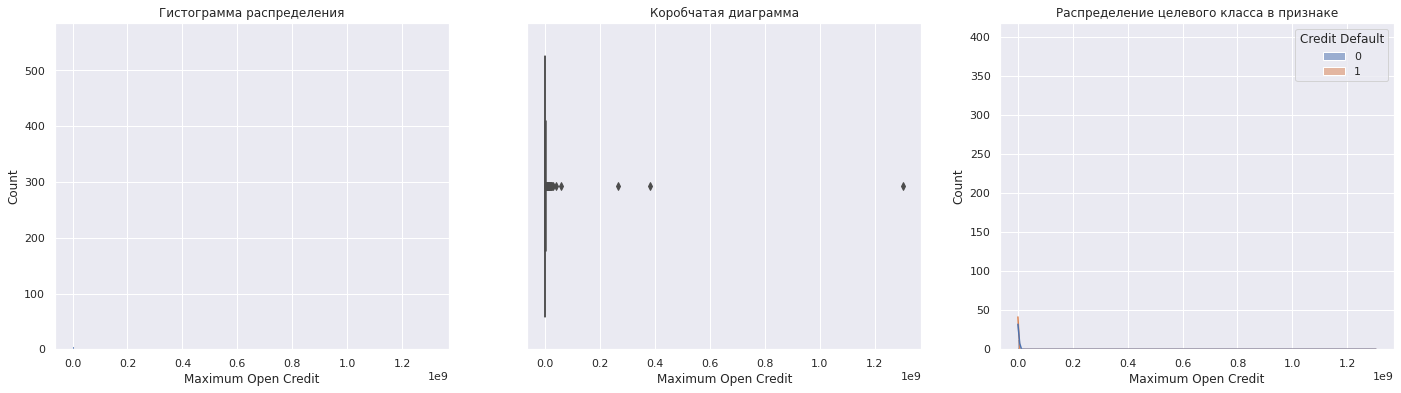

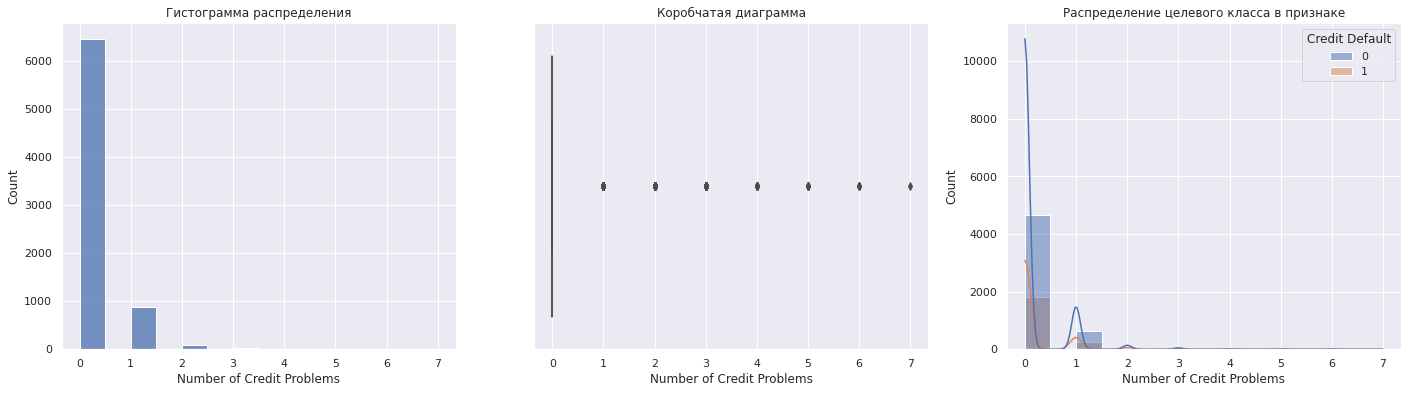

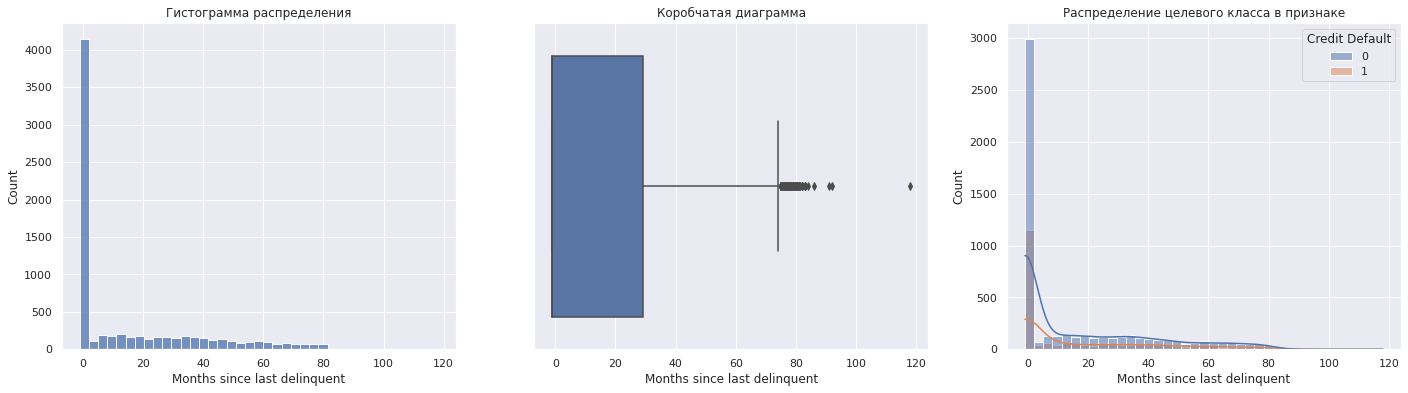

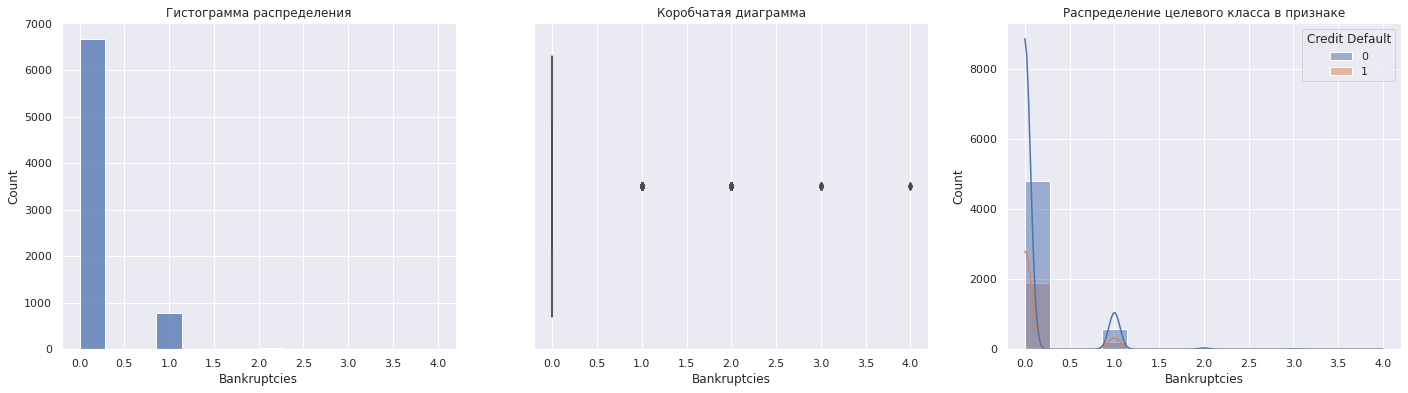

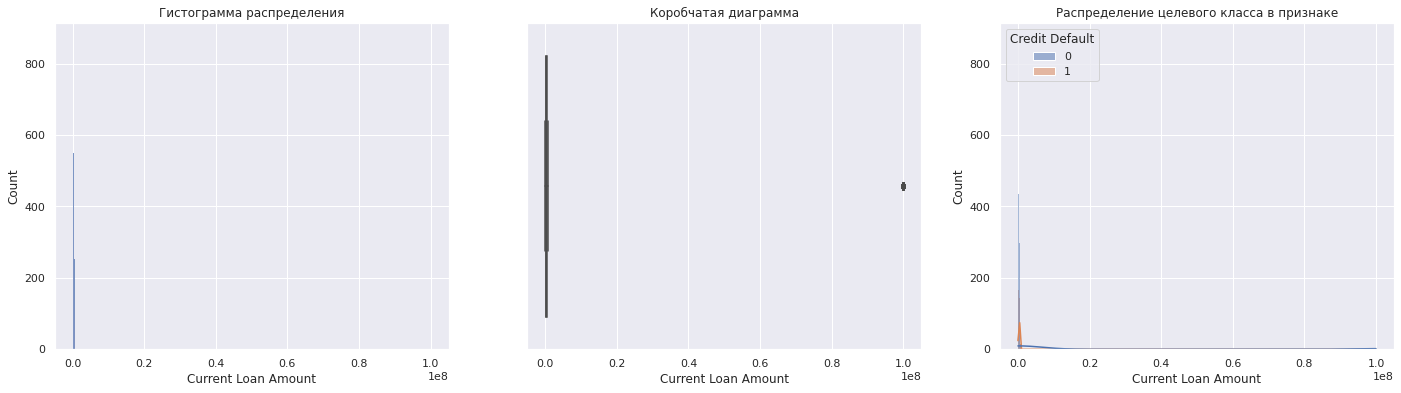

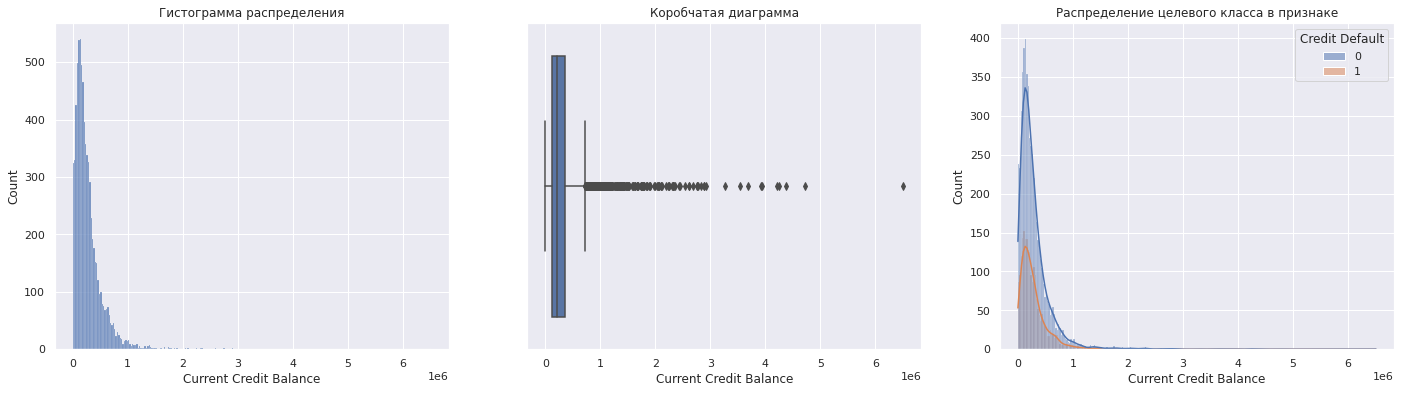

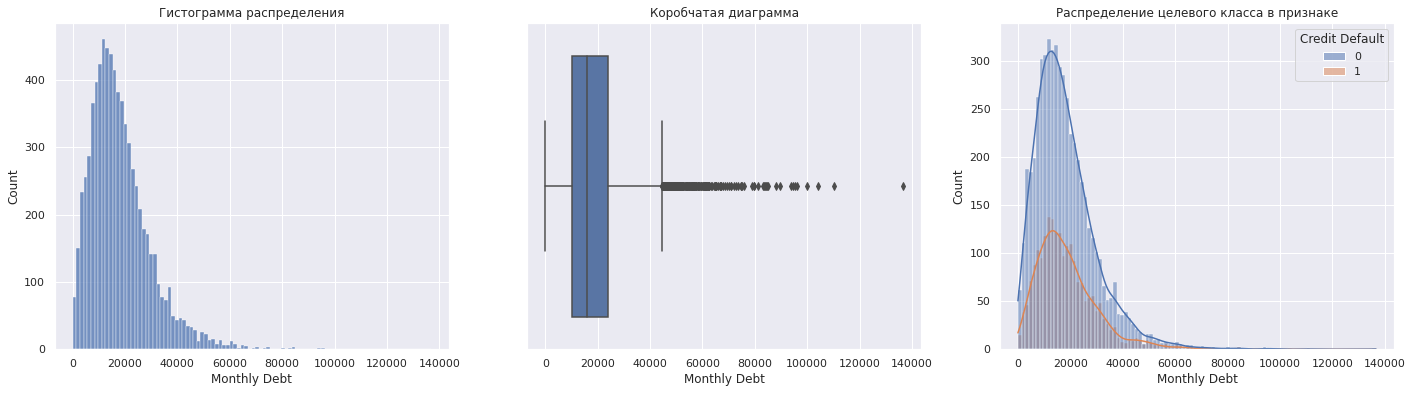

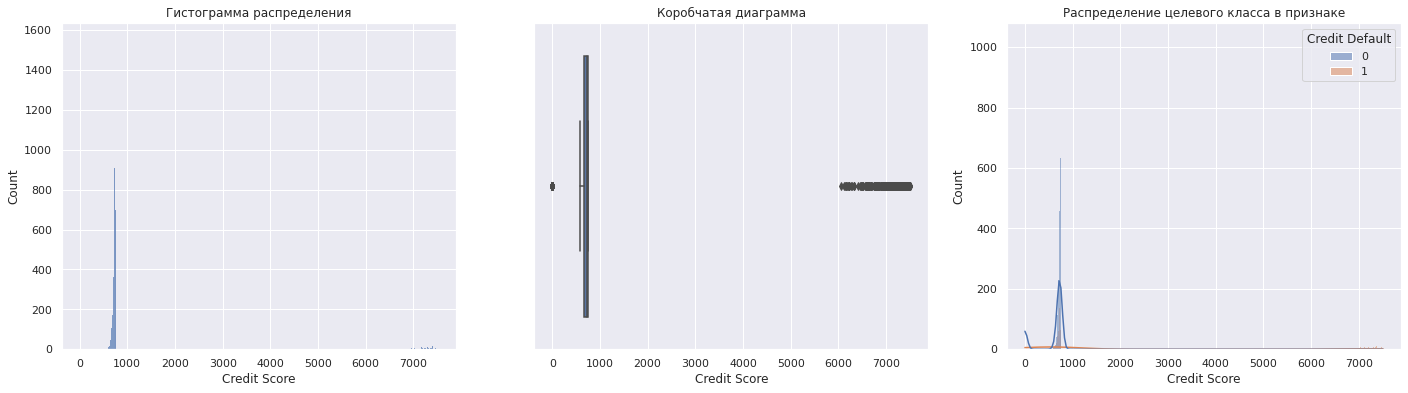

In [ ]:
# выведем гистограмы распределения количественных признаков
figsize = (24,6)
for col in num_cols:
    fig, ax = plt.subplots(1,3, figsize = figsize)
    sns.histplot(x = col, data = data, ax = ax[0])
    sns.boxplot(x = col, data = data, whis = 1.5, ax = ax[1])
    sns.histplot(x = col, hue= 'Credit Default', kde = True, data = data,  ax = ax[2]) 
    

    ax[0].set_title('Гистограмма распределения')
    ax[1].set_title('Коробчатая диаграмма')
    ax[2].set_title('Распределение целевого класса в признаке')
    plt.show()


__Выводы:__<br>
_Annual Income_ - Из-за замены отсутствующих значений на медианные, образовался значительный пик на данном значении, в область выбросов попали клиенты с высоким уровнем дохода. Видимые отличий целевого класса  в данном признаке отсутствуют.<br>
_Tax Liens_ - Большинство значений соответствуют 0, значения свыше 1 попадают в зону выбросов. В характере распределения целевой величины в данном признаке отличий тажке нет.<br>
_Number Of Open Accounts_ - распределение признака близко к нормальному. Значения свыше 22 открытых счетов попадают в зону выбросов. В характере распределения целевого класса в данном признаке видимых отличий нет.<br>
_Years Of Credid History_ - распределение признка близко к нормальному, клиеты с кредитной историей свыше 33 лет попадают в зону выбросов. Видимых отличий в распредлении целевого класса не имеется.<br>
_Maximum Opend Credits_ - признак имеет значительные выборосы, аналз признака пока затруднителен. <br>
_Number of Credid Problems_ - признак является дискретным, ожидаемо большинство клиентов проблем с погашениями долгов не имеет. К сожалению распределение класса по данному признаку тажке явных отличий не имеет (проблемные заемщики встречаются во всех группах).<br>
_Months since last delinquent_ - Из-за обработки пропусков распределение признака образовало два пика. Заметных отличий в распределениях классов также не имеется. Причем доля заемщиков допустивших дефолт по выплатам среди тех, кто ранее данные проблемы не имел почти одинаковы.<br>
_Bankruptcies_ - большинство заемщиков ранее банкротств не допускало, заемщики имеющие хотя-бы один случай банкротства попали в зону выбросов. Похоже случаи дефолта случаются примерно одинаково в обоих группах заемщиков.<br>
_Current Loan Amount (Текущая сумма кредита)_ - признак также сильно искажен выбросами. Заметных отличий в классах нет. Необходимо провести дообработку данных.<br>
_Current Credit Balance (Текущий кредитный баланс)_ - распределение имеет форму логнормального, из-за значительного количества выбросов справа. Явных отличий между клаасами по данному признаку не наблюдается. <br>
_Monthly Debt (Ежемесячный долг)_ - распределение признака близко к нормальному, имеются выбросы справа. Явного отличия в распределениях целевого класса не наблюдается.<br>
_Credit Score (Баллы кредитного рейтинга)_ - на распределение призака также значительное влияние оказывают выбросы необходима их обработка. <br>
<HR>
<Br>
ОБЩИЕ ВЫВОДЫ: <br>
1. Ни один признак не дает четкое разделение классов. Это не даст использовать наиболее простые и наименее ресурсоемкие модели машинного обучения. 
2. Необходимо осуществить обработку выбросов у следующих признаков: <ul> 
<li> Annual Income  </li>
<li> Number Of Open Accounts </li>
<li> Years Of Credid History</li>
<li> Maximum Open Credits </li>
<li> Current Loan Amount </li>
<li> Current Credit Balance </li>
<li> Monthly Debt </li>
<li> Credit Score </li>
</ul>
Заменить выбросы справа на медианные значения. <br>

3. По остальным признакам, в основном являющимися дискретными, будет необходимо ограничить максимальное значение для совместимости тренировочного и тестового набора.

In [ ]:
# Определим аналитически соответствие распределений признаков нормальному распределению
from scipy.stats import shapiro

In [ ]:
for col in num_cols:
    print('='*30, col, '='*30)
    w, p_val = shapiro(data[col].values[:4900])
    if p_val < 0.05:
        print(f"Распределение признака соответствует нормальному, p-value: {round(p_val,6)} [0.05]")
    else:
        print(f"Распределение признака отличается от нормального, p-value: {round(p_val,6)} [0.05]")
    print('='*80, '\n','\n')

============================== Annual Income ==============================
Распределение признака соответствует нормальному, p-value: 0.0 [0.05]
 

============================== Tax Liens ==============================
Распределение признака соответствует нормальному, p-value: 0.0 [0.05]
 

============================== Number of Open Accounts ==============================
Распределение признака соответствует нормальному, p-value: 0.0 [0.05]
 

============================== Years of Credit History ==============================
Распределение признака соответствует нормальному, p-value: 0.0 [0.05]
 

============================== Maximum Open Credit ==============================
Распределение признака соответствует нормальному, p-value: 0.0 [0.05]
 

============================== Number of Credit Problems ==============================
Распределение признака соответствует нормальному, p-value: 0.0 [0.05]
 

============================== Months since last delinquent ============

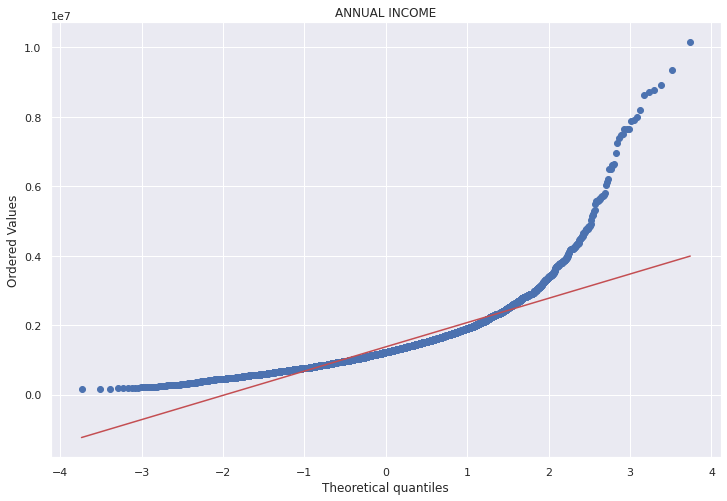

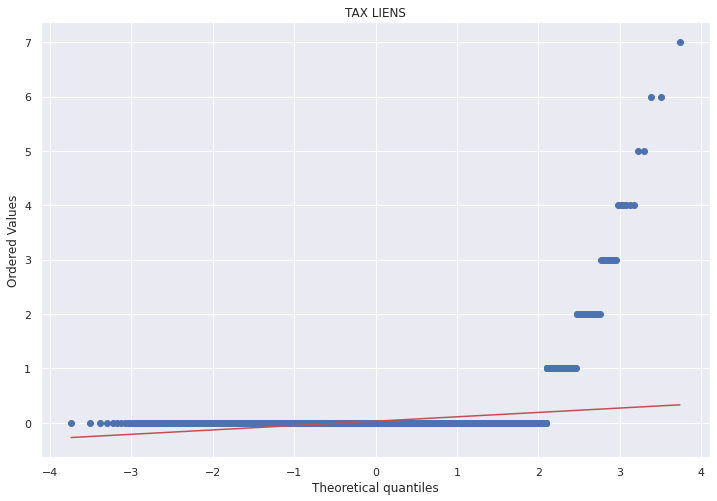

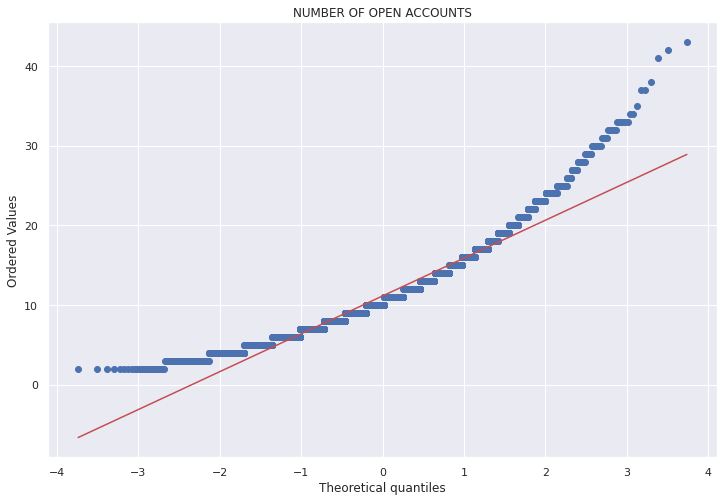

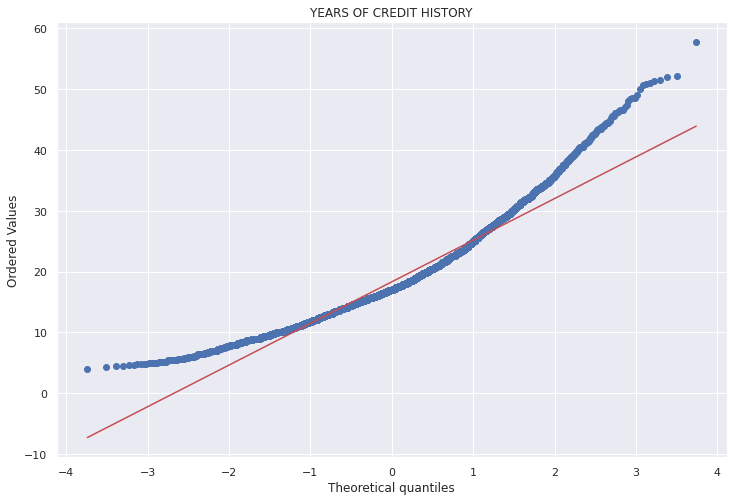

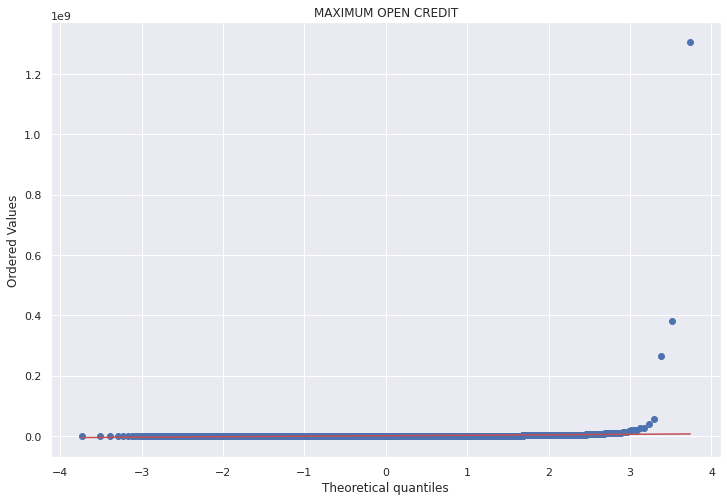

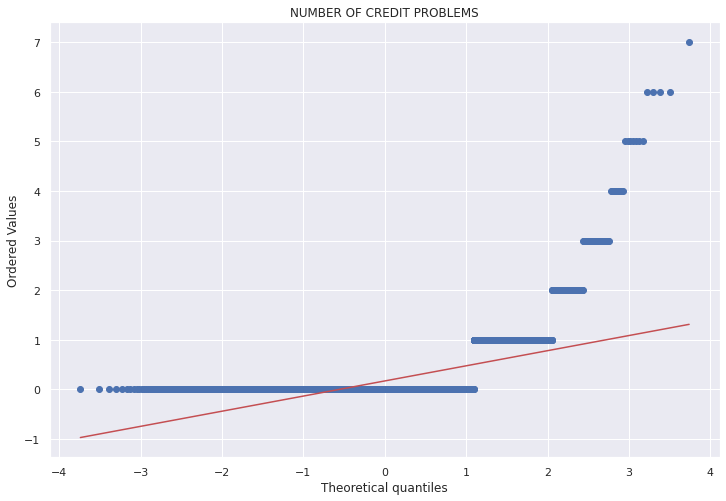

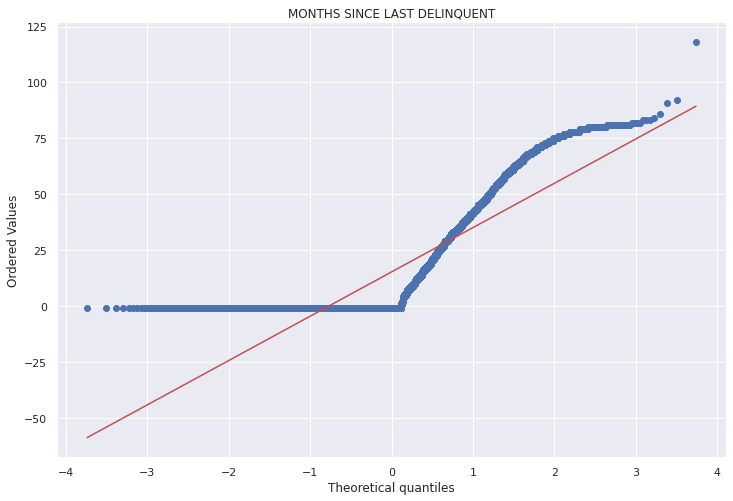

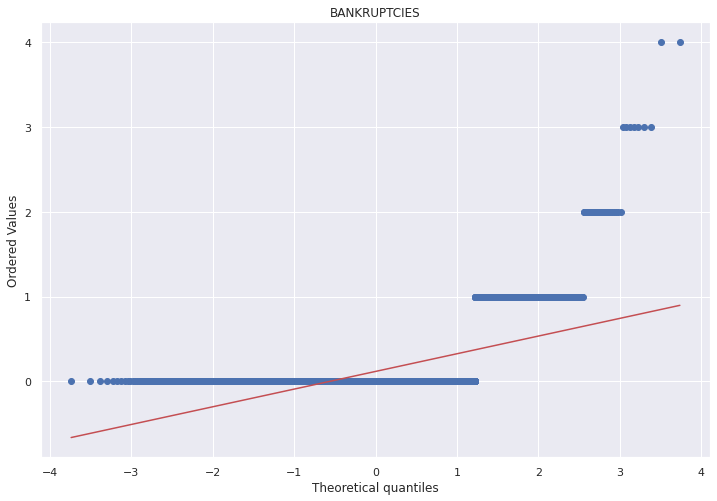

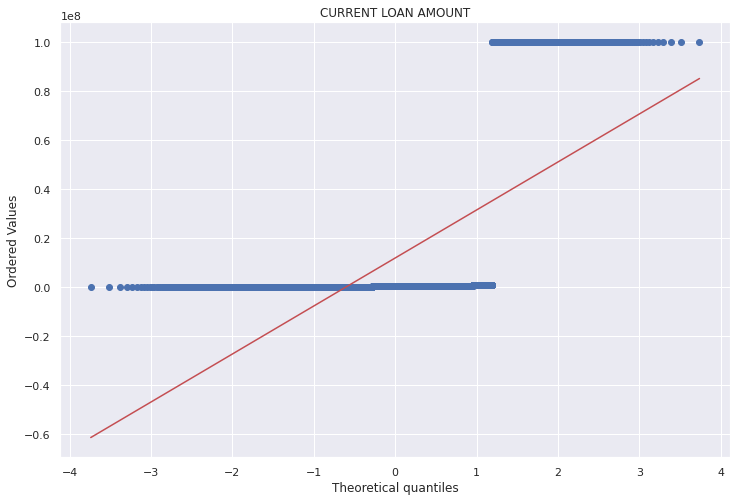

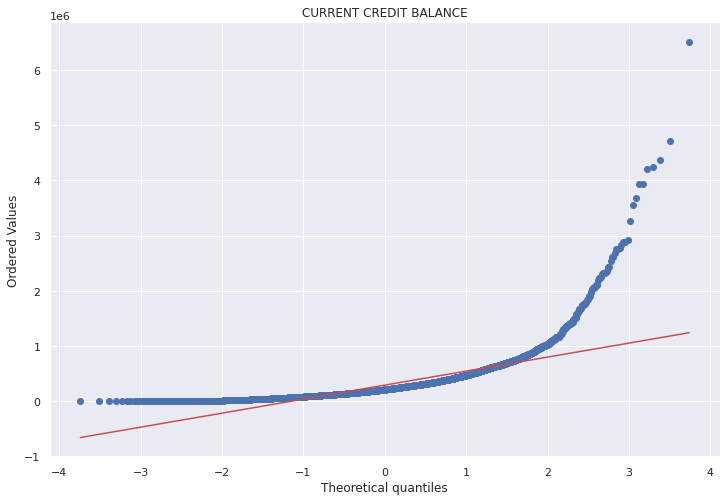

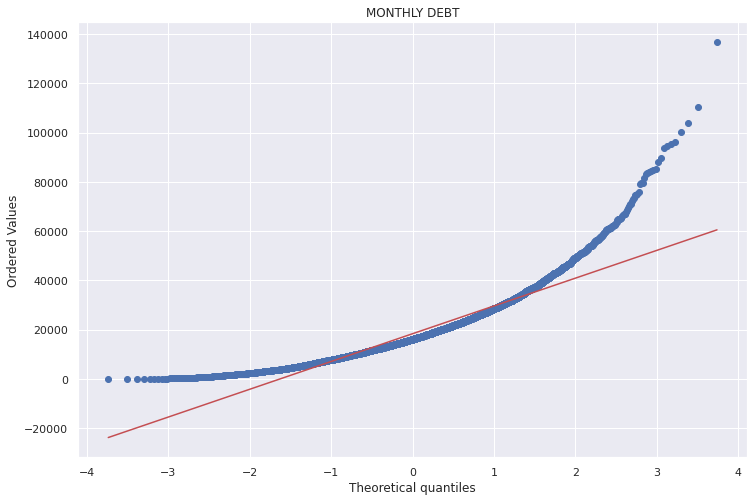

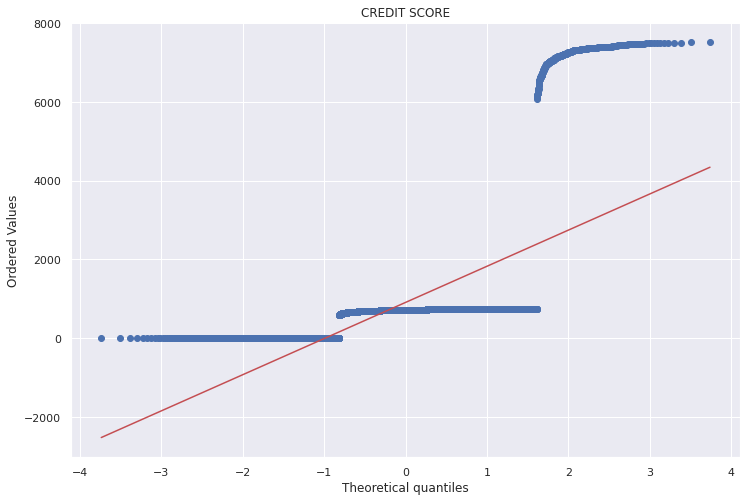

In [ ]:
# Выведем график квантилей по каждому признаку
from scipy.stats import probplot
for col in num_cols:
    plt.figure(figsize = (12,8))
    probplot(data[col], dist = 'norm', plot = plt)
    plt.title(col.upper())
    plt.show()

Несмотря на аналитический расчет, графики по ряду признаков явно не соответствуют нормальному распределению: <br>
Number of Credit Problems <br>
Months since last delinquent<br>
Bankruptcies <br>
Current Loan Amount <br>
Credit Score <br>

### 2.3. Анализ категориальных признаков

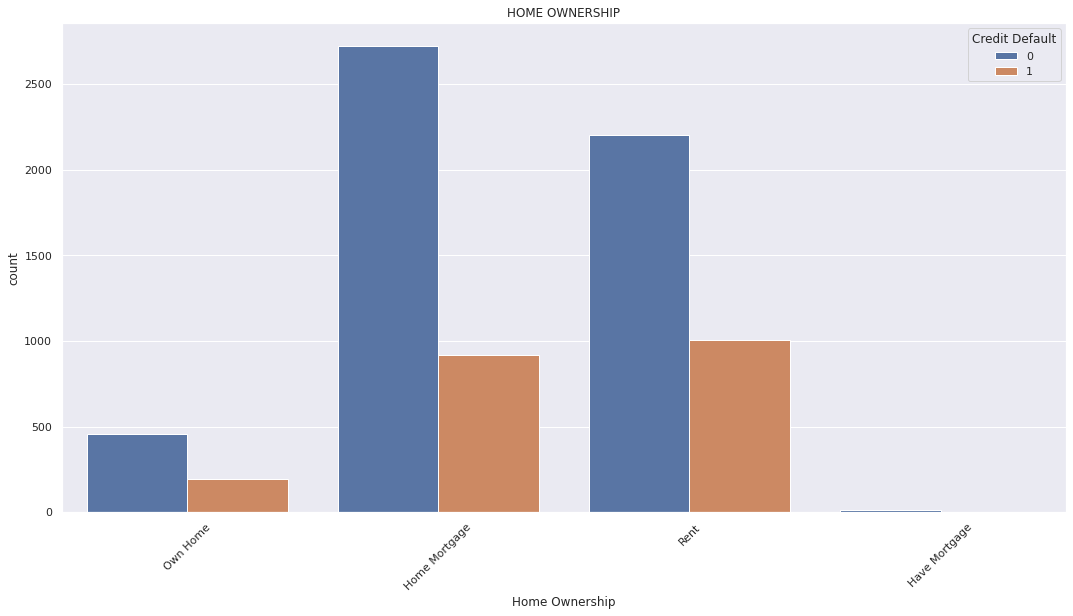

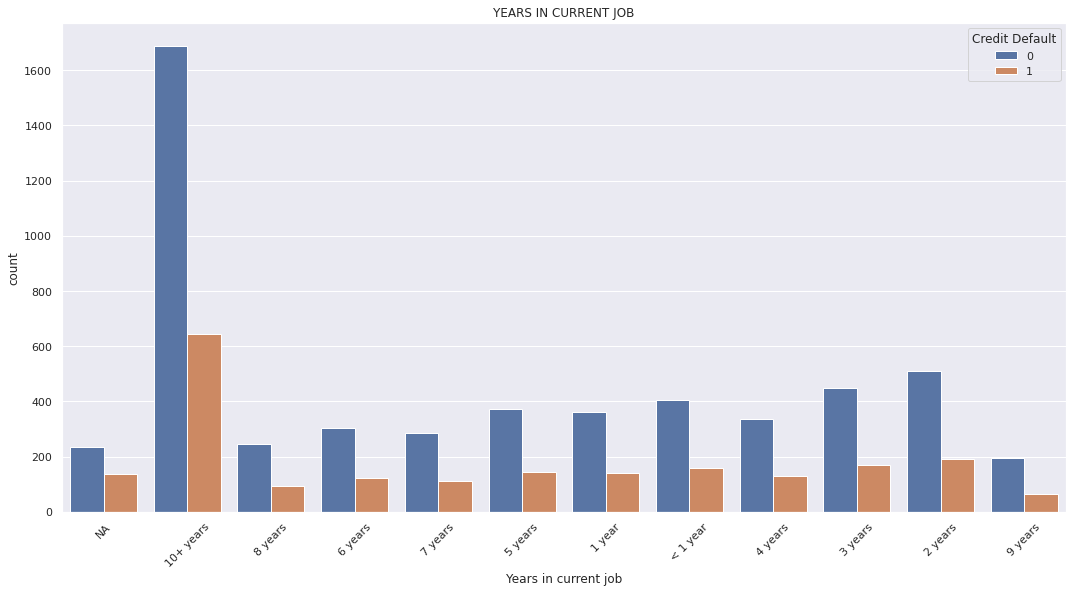

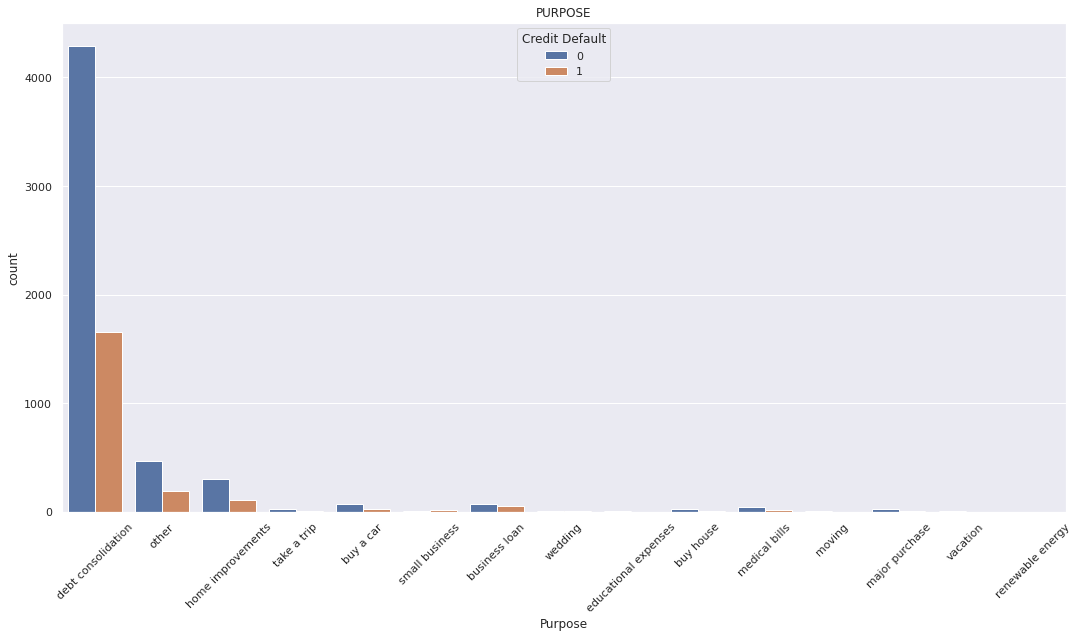

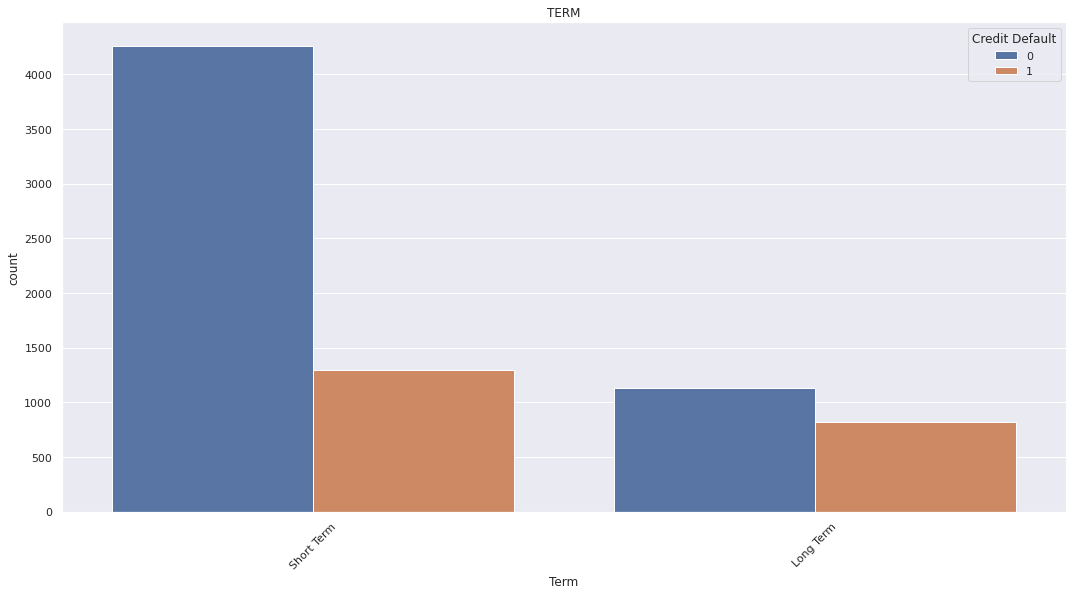

In [ ]:
# Выведем диаграммы частот каждого класса в признаке 


for col in cat_cols:
    plt.figure(figsize= (18,9))
    ax1 = sns.countplot(x = col, hue ='Credit Default', data = data)
    ax1.set_title(col.upper())
    plt.xticks(rotation = 45)
    plt.show()

### 2.4. Матрица корреляций

In [ ]:
cor_mat = data.corr()

In [ ]:
cor_mat.values[np.abs(cor_mat.values) < 0.2] = 0

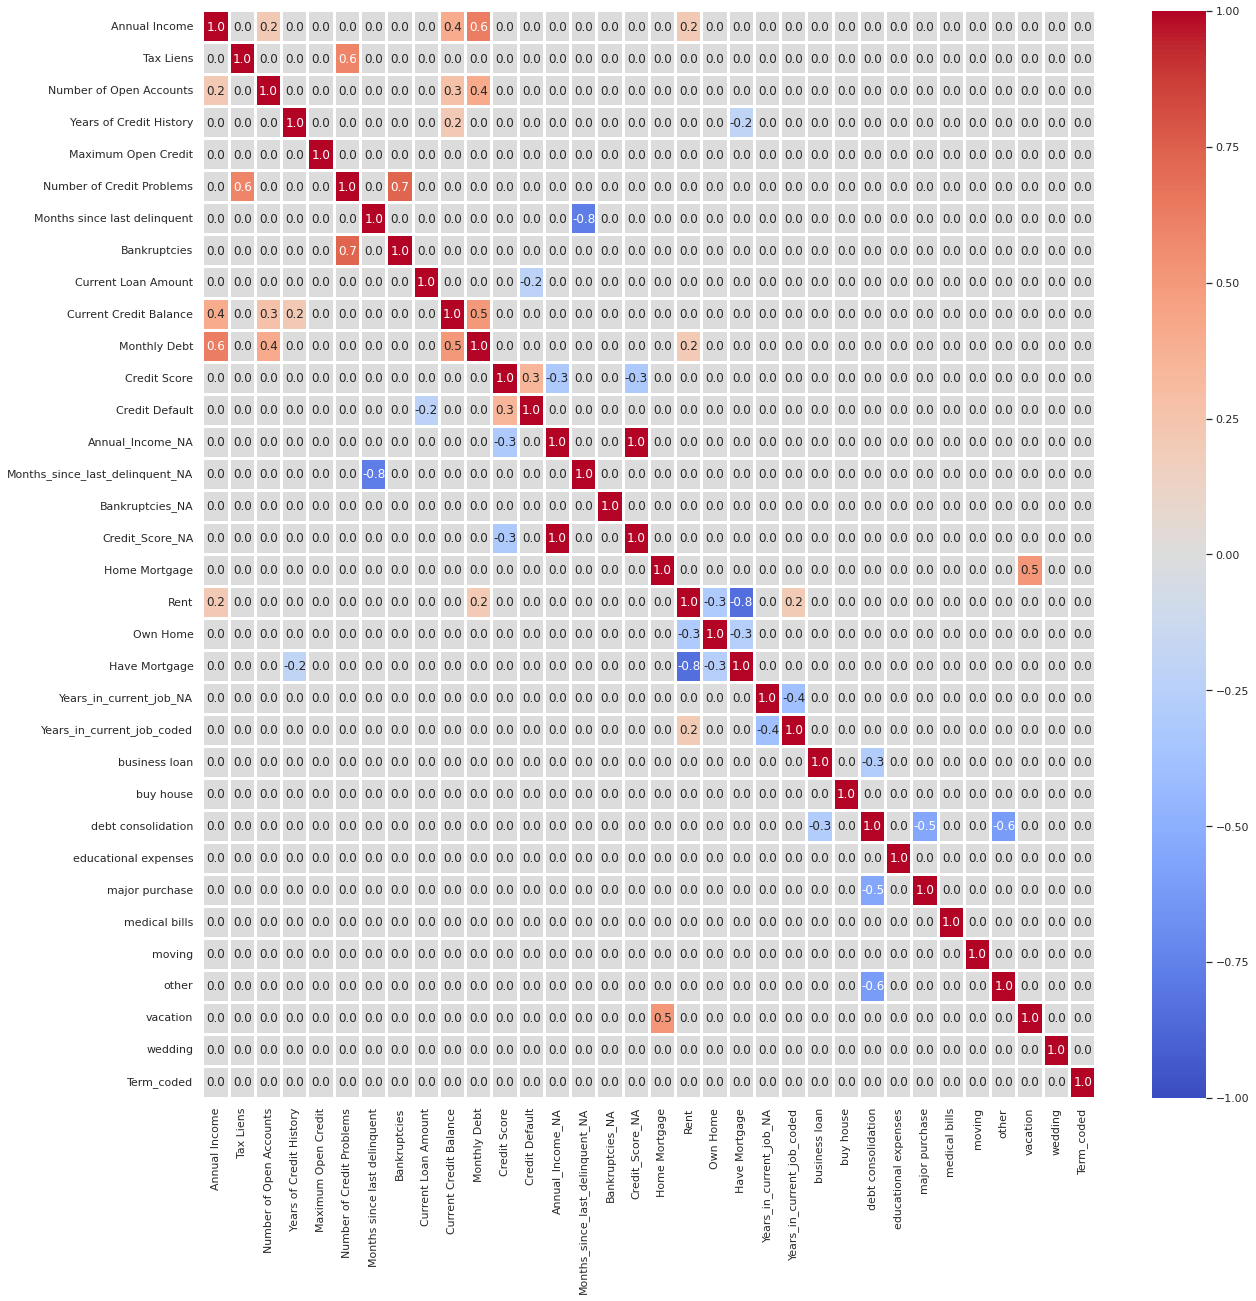

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(cor_mat, vmin = -1, vmax = 1, cmap = 'coolwarm', linewidths= 2, linecolor= 'white', fmt = '.1f', annot= True)

Значимая корреляция между целевой переменной и каким либо из признаков отсутствует. Слабая отрицательная корреляция с признаком Credit Loan Ammount и слабая положительная корреляция с признаком Credit Score (почему-то чем выше кредитный ретинг тем выше вероятность дефолта). <br>
Сильная положительная корреляция обнаружилась между признаками Credid_score_NA и Annual_income_NA, так как кредитный рейтинг рассчитывается при наличии дохода. Ожидаемо сильная корреляция наблюдается между случая банкротства клиента Bancruptcies и наличием проблем с кредитом Number of Credit Problems (заемщик, который допускал банкротсва, хуже обслуживает новый займ).
Сильная отрицательная корреляция обнаружена меду признаком Months since last delinquent и его сигнальными признаком. <br>
Значимая отрицательная корреляция обнаружилась у взаимоисключащих категорий  домовладения Have Mortage - Retnt и целей кредита - Debt consolidation (рефинансирование долга) - Other (иные цели кредита).<br>
В целом линейно-зависимые признаки практически отсутствуют.<br>

### 2.5. Замечание по итогам EDA 
<p> Имеются основание полагать, что признаки используемые в наборе данных могут быть нестационарными (изменяться во времени) и таким образом ранее обученная модель может перестать быть эффективной с течением времени. Набор данных рассматривает только данные заемщика, при этом отсутствуют признаки связывающие модель машинного обучения с внешенй средой. </p> 
<p> Тем не менее, как раз факторы внешней среды: динамика ставок по кредитам, текущий экономический цикл, ставка рефинасирования (учетная ставка), валютный курс, инфляция и т.п. могут оказывать сильное влияние на вероятность дефолта заемщика. </p>
<p>Если к примеру кредит был взят на этапе экономического роста и мягкой денежно-кредитной политики и на всем периоде его погашения макроэкономические условия не сильно менялись вероятность наступления дефолта остается маловероятной. В случае если после получения займа началось падение экономики, рост цен, обесценение национальной валюты, даже у заемщиков со стабильным уровнем дохода возрастают риски дефолта. </p>

# 3. Класс для предобработки данных

In [ ]:
class DataPreparator:
    def __init__(self):
        # поля для обработки датасетов
        self.num_cols = ['Annual Income', 'Tax Liens',  'Number of Open Accounts',  'Years of Credit History',
                         'Maximum Open Credit',  'Number of Credit Problems',  'Months since last delinquent',
                         'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',  'Credit Score']
        self.target = 'Credit Default'
        self.cat_cols = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']
        self.data_stats = None
        self.income_reg = None  # модель линейной регрессии для признака Annual Income
        self.HO_coder = None  # поле для кодировщика признака Home ownership
        self.job_cats = {'Years in current job': {'NA': -1,'< 1 year': 0, '1 year':1, '2 years':2, '3 years': 3, '4 years': 4, '5 years':5, '6 years':6, '7 years':7, 
                                     '8 years':8, '9 years':9, '10+ years':10}}
        self.merged_cats = {'Purpose': {'take a trip': 'vacation', # путешествие и отпуск довольно близки по смыслу и частотам
                          'buy a car': 'major purchase', #  приобретение машины тоже можно считать "большой покупкой"
                          'home improvements': 'major purchase', #  тоже и про ремонт (улучшение) жилья
                          'small business': 'business loan', #  различные бизнес-цели и возобновляемую энергетику 
                          'renewable energy': 'business loan'} } 
        self.p_coder = None # Поле для кодирования признака Purpose
        self.term_cat = {'Term': {'Short Term': 0, 'Long Term': 1 }} # коды для признка Term
        return

    def fit(self, data):
        """
        Расчет параметров датасета, необходимых для последующего преобразования
        """
        print('Вычисление описательной статистики по признакам')
        self.data_stats = data[self.num_cols].describe()

        print('Расчет регрессии для признака Annual Income')
        d_data =  data[num_cols].dropna(axis = 0)
        print('Инициализация регрессиии...')
        self.income_reg = LinearRegression()
        self.income_reg.fit(d_data['Monthly Debt'].values.reshape(-1,1), d_data['Annual Income'])
        del d_data
        print('Меодель регрессии готова')

        print('Обучение кодера для Home Ownership')
        self.HO_coder = OneHotEncoder()
        self.HO_coder.fit(data['Home Ownership'].values.reshape(-1,1))
        print('кодировщик обучен...')

        print('Объединение категорий для Purpose')
        print('Объединение "близких" катергорий')
        data['Purpose_merged'] = data.replace(self.merged_cats)['Purpose']

        print('Обучение кодера для Purpose')
        self.p_coder = OneHotEncoder()
        self.p_coder.fit(data.Purpose_merged.values.reshape(-1,1))
       
        return

    def transform(self, data):
        """ 
        Выполняет очистку данных и преобразование набора данных, для обеспечения 
        совместимости датасета и применения машинного обучения

        """
        print('='*30,'Обработка количественных признаков', '='*30)
        print('Обработка признака "Annual Income"... ')
        data['Annual_Income_NA'] = pd.Series(data=np.zeros(data.shape[0]), index = data.index)
        data.Annual_Income_NA.loc[data['Annual Income'].isna()] = 1
        print('Сигнальный признак...')
        #data['Annual Income'].loc[data.Annual_Income_NA == 1] = data['Annual Income'].median()
        data['Annual Income'].loc[data.Annual_Income_NA == 1] = self.income_reg.predict(data['Monthly Debt'].loc[data.Annual_Income_NA == 1].values.reshape(-1,1))
        print('Заполение пропусков...')
        print('Признак обработан. \n')

        print('Обработка признака "Months since last delinquent"... ')
        data['Months_since_last_delinquent_NA'] = pd.Series(data = np.zeros(data.shape[0]),
                                                    index = data.index)
        data.Months_since_last_delinquent_NA.iloc[data['Months since last delinquent'].isna()] = 1
        print('Сигнальный признак...')
        data['Months since last delinquent'].loc[data.Months_since_last_delinquent_NA == 1] = -1
        print('Заполение пропусков...')
        print('Признак обработан. \n')

        print('Обработка признака "Bankruptcies"... ')
        data['Bankruptcies_NA'] = pd.Series(data = np.zeros(data.shape[0]), index = data.index)
        data.Bankruptcies_NA.loc[data.Bankruptcies.isna()] = 1
        print('Сигнальный признак...')
        data.Bankruptcies = data.Bankruptcies.fillna(value = 0)
        print('Заполение пропусков...')
        print('Признак обработан. \n')

        print('Обработка признака "Credit Score"... ')
        data['Credit_Score_NA'] = pd.Series(data = np.zeros(data.shape[0]),
                                    index = data.index)
        data.Credit_Score_NA.loc[data['Credit Score'].isna()] = 1
        print('Сигнальный признак...')
        #data['Credit Score'].loc[data.Credit_Score_NA == 1] = self.data_stats['Credit Score'].loc['50%']
        data['Credit Score'].loc[data.Credit_Score_NA == 1] = 0
        print('Заполение пропусков...')
        print('Признак обработан. \n')

        print('Обработка выбросов...')

        sel_cols =  ['Annual Income', 'Number of Open Accounts',  'Years of Credit History',
                         'Maximum Open Credit', 'Months since last delinquent',
                         'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',  'Credit Score']
        for col in sel_cols:
            print('Обработка ', col, ' ...')
            data[col] = self.cut_quants(data[col], q50 = self.data_stats[col].loc['50%'], q75 = self.data_stats[col].loc['75%'], left = True, whis = 1000)

        sel_cols =   ['Tax Liens','Number of Credit Problems', 'Bankruptcies'] # Признаки, для которых ограничиваем максимальное значене (чтобы не "попасть" на бесконечность)  
        for col in sel_cols:
            print('Обработка ', col,  ' ...')
            dmax = self.data_stats[col].loc['max']
            data[col].loc[data[col] > dmax] = dmax
        
        print('Обработка выбросов завершена \n \n \n')

        print('='*30,'Обработка категориальных признаков ','='*30)
        print('Кодирование признака Home Ownership')
        HO_coded = self.HO_coder.transform(data['Home Ownership'].values.reshape(-1,1)).toarray()
        ho_cats = list(*self.HO_coder.categories_)
        HO_coded = pd.DataFrame(data = HO_coded, index = data.index, columns = ho_cats) 
        data = pd.concat([data, HO_coded], axis = 1, join= 'inner')
        print('Кодирование признака завершено')

        print('Обработка признака Years in current job')

        # создадим сигнальный признак
        print('Сигнальный признак Years_in_current_job_NA ...')
        data['Years_in_current_job_NA'] = pd.Series(data = np.zeros(data.shape[0]), index = data.index)
        data.Years_in_current_job_NA.loc[data['Years in current job'].isna()] = 1

        # Пометим пропуски 
        data['Years in current job'] = data['Years in current job'].fillna('NA')

        print('Добавление кодированного признака Years_in_current_job_coded ...')
        data['Years_in_current_job_coded'] = data.replace(self.job_cats)['Years in current job']
        print('Обработка признака завершена')

        print('Обработка признака Purpose')
        print('Объединение "близких" катергорий')
        data['Purpose_merged'] = data.replace(self.merged_cats)['Purpose']
        print('Кодирование категорий Purpose...')
        p_coded = self.p_coder.transform(data.Purpose_merged.values.reshape(-1,1)).toarray()
        p_cats = list(*p_coder.categories_)
        p_coded = pd.DataFrame(data = p_coded, columns= p_cats, index= data.index)
        data = pd.concat([data, p_coded], axis=1, join = 'inner')
        print('Признак обработан')

        print("Признак Term")
        data['Term_coded'] = data.replace(self.term_cat)['Term']
        print("Признак обработан")
      

        return data
    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

    def cut_quants(self, data, q50, q75, whis = 1.5, left = False): # Оказалось, что значение whis = 1.5 сильно снижает вариативность признаков и мешает обучению. Подбором выбран 1000
        """
        Для ряда данных data осуществляет замену выбросов медианными значениями. 
        Выбросы определяются размером интерквантильного интервала и параметром whis,
        По умолчанию замена выбросов справа не осуществляется
        """
        #print (type(data)) # переданный тип данных
        r_side = q50 + whis*(q75-q50)
        l_side = q50 - whis*(q75-q50)

        data.loc[data > r_side] = q50
        if left:
            data.loc[data < l_side] =  q50

        return data

In [ ]:
# удаляем старый датафрейм
del data

In [ ]:
data = pd.read_csv(train_data_link) # снова загружаем набор данных для обучения
val_data = pd.read_csv(test_data_link) # загружаем контрольный набор данных

In [ ]:
# инициализурем предобработчик
d_prep = DataPreparator()

In [ ]:
# преобразуем тренировочный набор
data = d_prep.fit_transform(data)

Вычисление описательной статистики по признакам
Расчет регрессии для признака Annual Income
Инициализация регрессиии...
Меодель регрессии готова
Обучение кодера для Home Ownership
кодировщик обучен...
Объединение категорий для Purpose
Объединение "близких" катергорий
Обучение кодера для Purpose
============================== Обработка количественных признаков ==============================
Обработка признака "Annual Income"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка признака "Months since last delinquent"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка признака "Bankruptcies"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка признака "Credit Score"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка выбросов...
Обработка  Annual Income  ...
Обработка  Number of Open Accounts  ...
Обработка  Years of Credit History  ...
Обработка  Maximum Open Credit  ...
Обрабо

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Purpose_merged,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Have Mortgage,Home Mortgage,Own Home,Rent,Years_in_current_job_NA,Years_in_current_job_coded,business loan,buy house,debt consolidation,educational expenses,major purchase,medical bills,moving,other,vacation,wedding,Term_coded
0,Own Home,482087.0,NA,0.0,11.0,26.3,685960.0,1.0,-1.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,debt consolidation,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,-1.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,debt consolidation,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,-1.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,debt consolidation,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,-1.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,debt consolidation,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,-1.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,debt consolidation,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data.shape # форма набора данных сходится вроде преобразовано правильно

(7500, 39)

In [ ]:
# преобразование контрольного набора
val_data = d_prep.transform(val_data)

============================== Обработка количественных признаков ==============================
Обработка признака "Annual Income"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка признака "Months since last delinquent"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка признака "Bankruptcies"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка признака "Credit Score"... 
Сигнальный признак...
Заполение пропусков...
Признак обработан. 

Обработка выбросов...
Обработка  Annual Income  ...
Обработка  Number of Open Accounts  ...
Обработка  Years of Credit History  ...
Обработка  Maximum Open Credit  ...
Обработка  Months since last delinquent  ...
Обработка  Current Loan Amount  ...
Обработка  Current Credit Balance  ...
Обработка  Monthly Debt  ...
Обработка  Credit Score  ...
Обработка  Tax Liens  ...
Обработка  Number of Credit Problems  ...
Обработка  Bankruptcies  ...
Обработка выбросов завершен

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
# у проверочного набора данных отстутсвует тагерт (на одну колонку меньше)
val_data.shape

(2500, 38)

In [ ]:
val_data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Have Mortgage,Home Mortgage,Own Home,Rent,Years_in_current_job_NA,Years_in_current_job_coded,Purpose_merged,business loan,buy house,debt consolidation,educational expenses,major purchase,medical bills,moving,other,vacation,wedding,Term_coded
0,Rent,9.354670e+05,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Rent,2.318380e+05,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,educational expenses,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Home Mortgage,1.152540e+06,3 years,0.0,10.0,13.7,204600.0,0.0,-1.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Home Mortgage,1.220313e+06,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Home Mortgage,2.340952e+06,6 years,0.0,11.0,23.6,1207272.0,0.0,-1.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,debt consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


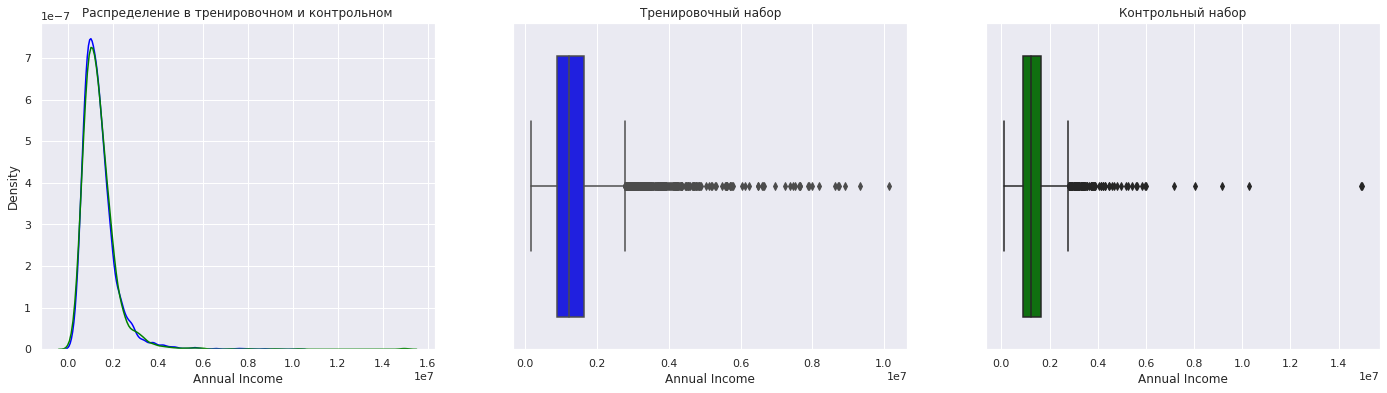

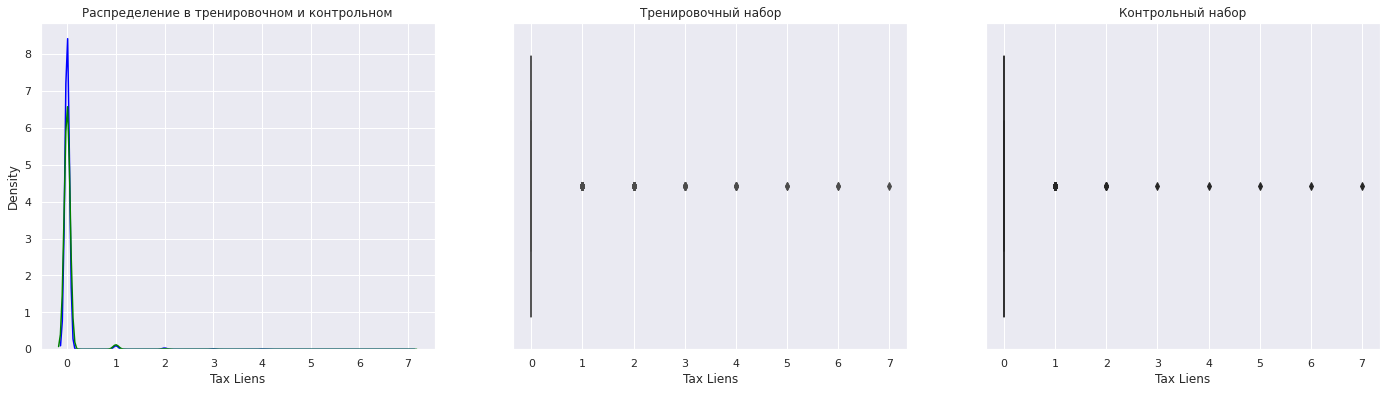

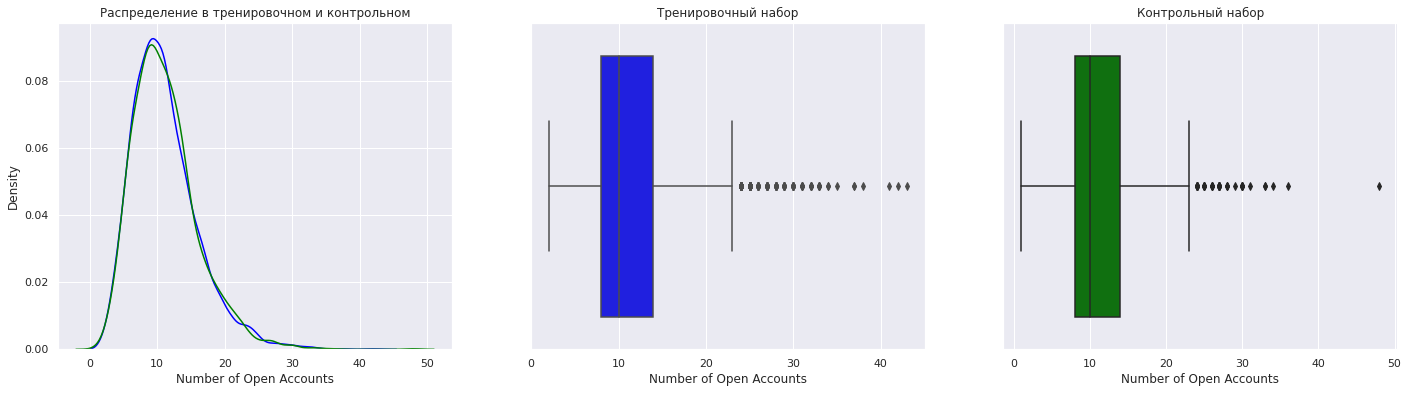

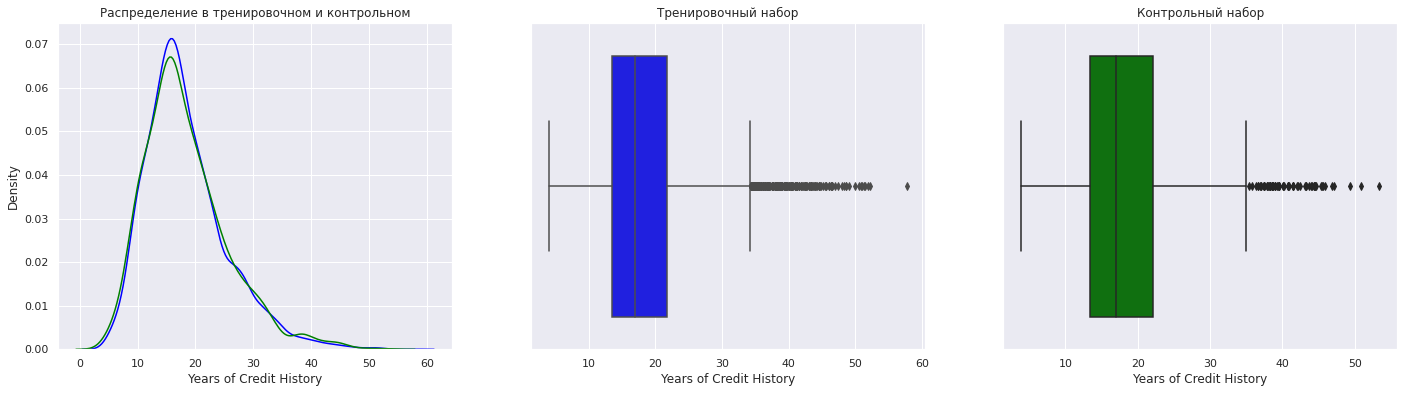

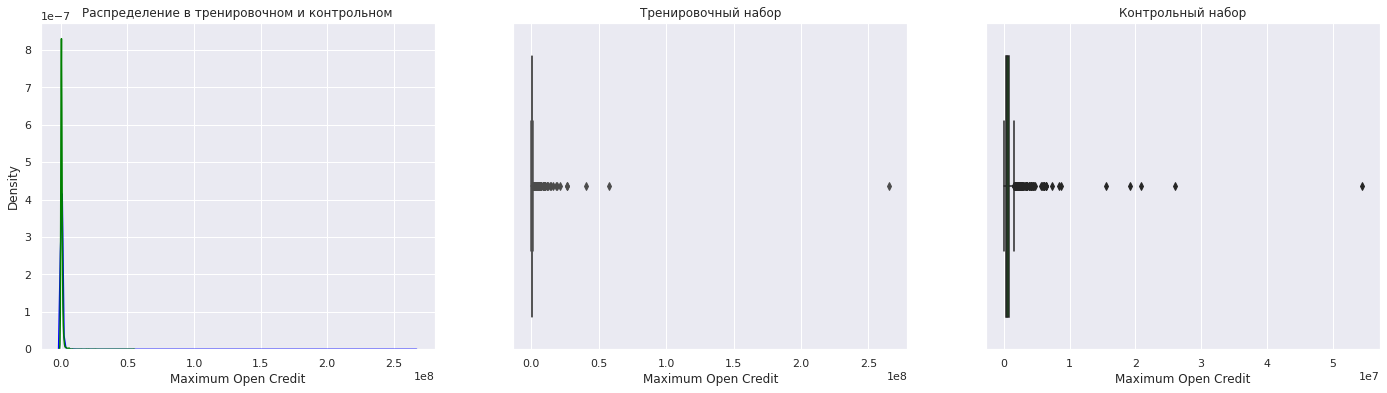

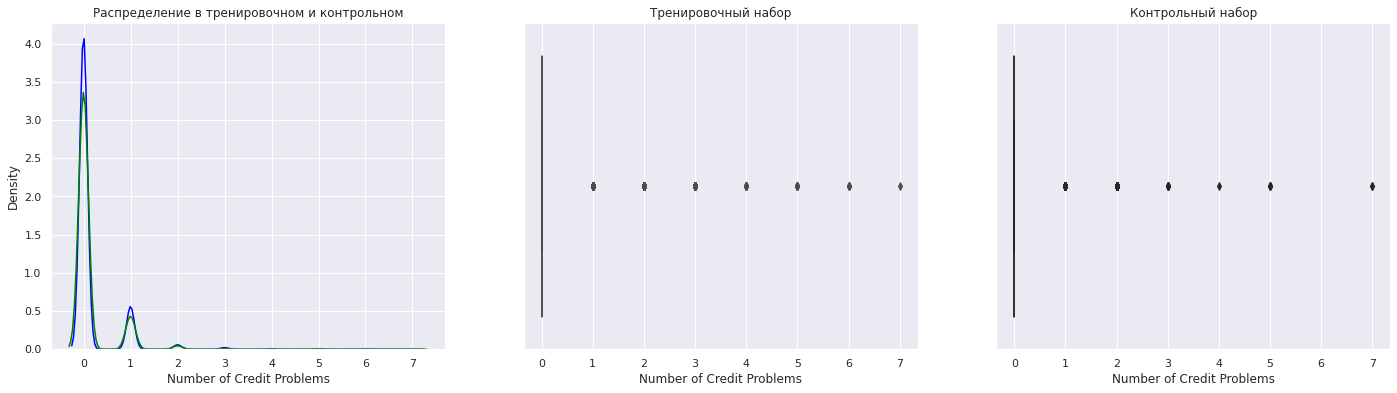

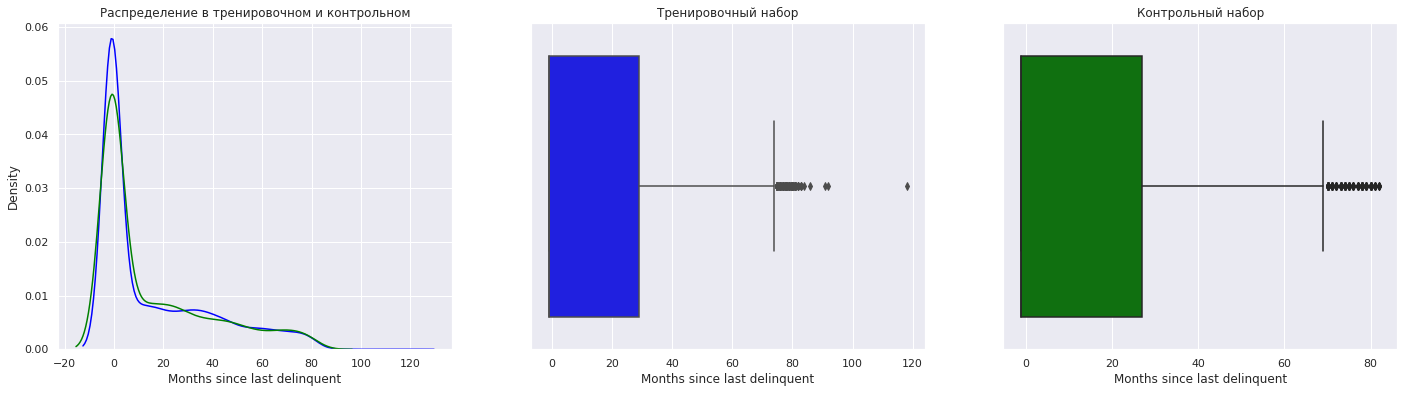

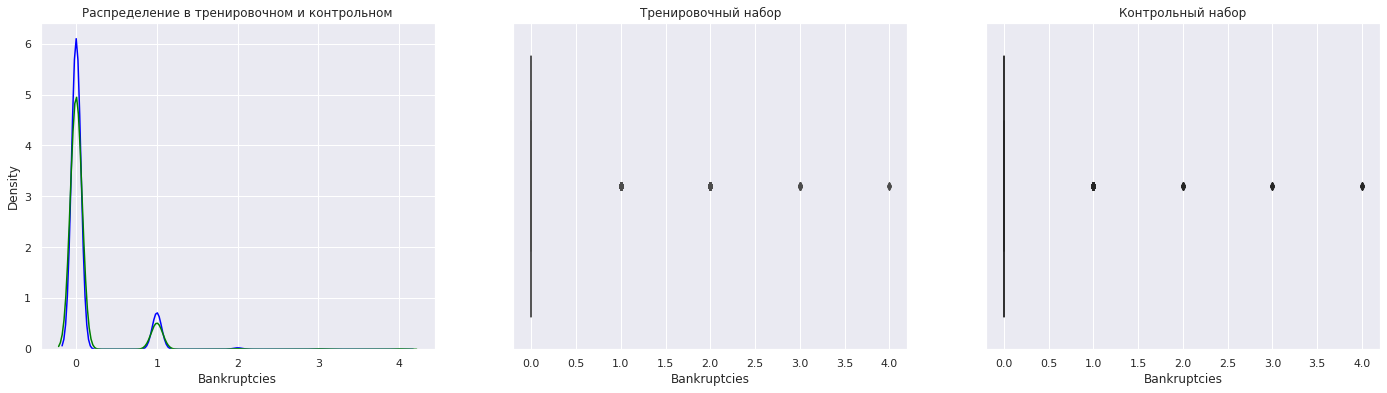

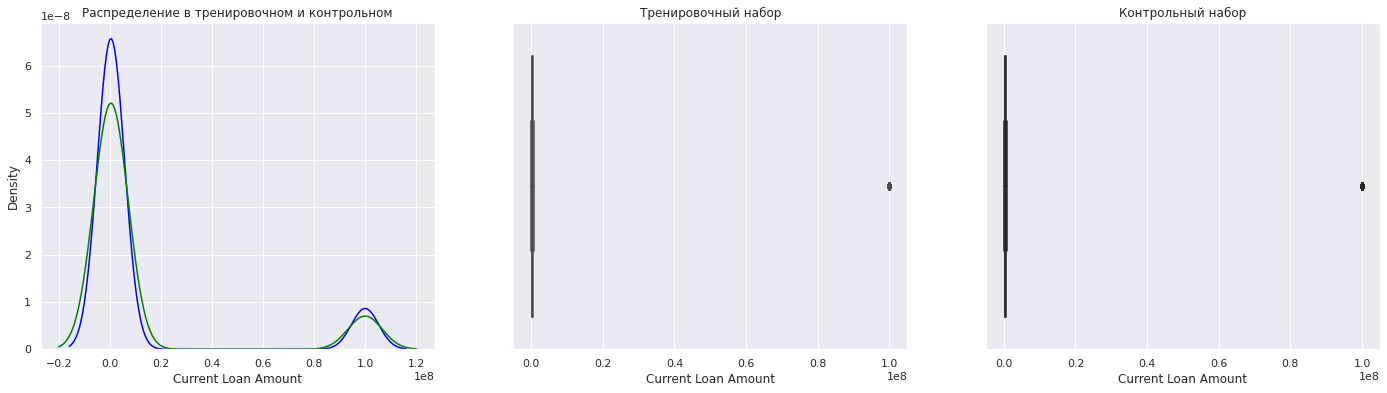

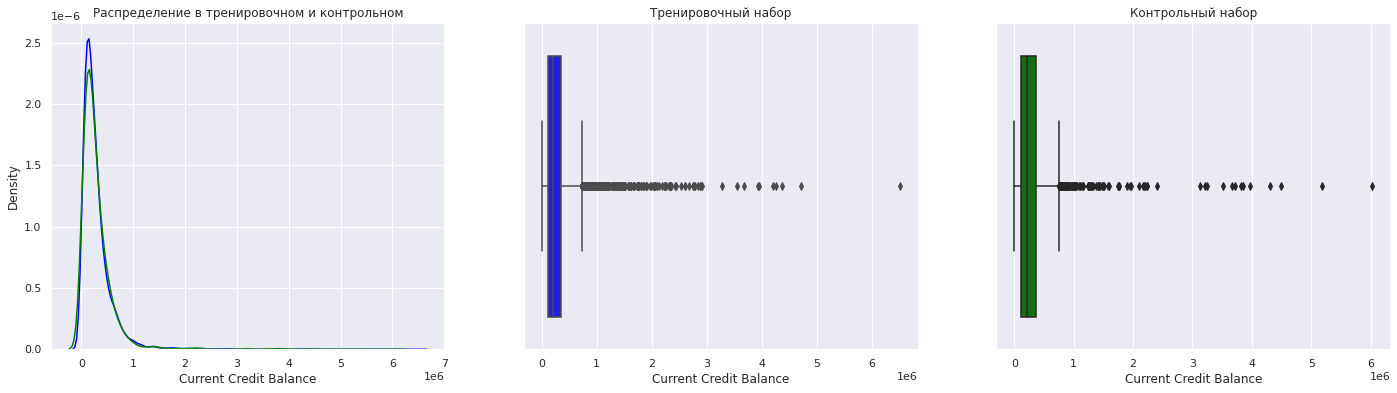

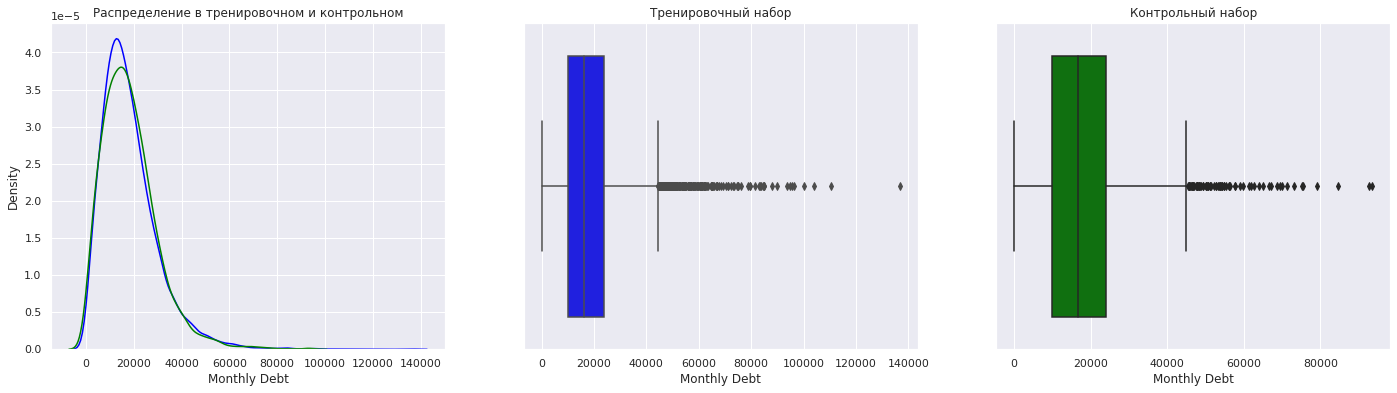

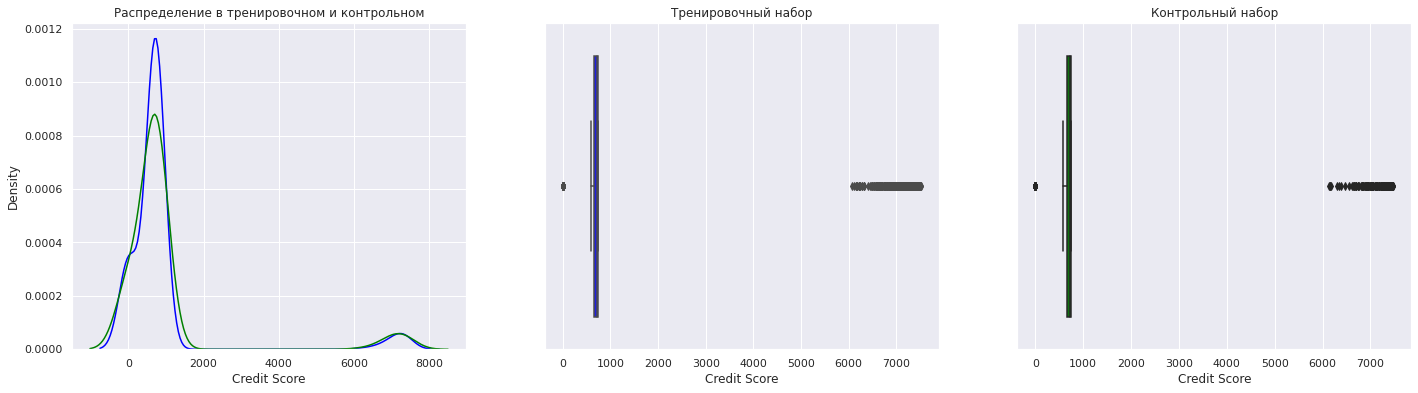

In [ ]:
# после очистки от выбросов распределенния количественных признаков наборов должны быть довольно близкими
figsize = (24,6)
for col in num_cols:
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = figsize)
    sns.kdeplot(x = col, data = data, label = 'train data', ax = ax[0], color = 'blue')
    sns.kdeplot(x = col, data = val_data, label ='test data', ax = ax[0], color = 'green')
    sns.boxplot(x = col, data = data,  ax = ax[1], color = 'blue')
    sns.boxplot(x = col, data = val_data,  ax = ax[2], color ='green')
    ax[0].set_title('Распределение в тренировочном и контрольном')
    ax[1].set_title('Тренировочный набор')
    ax[2].set_title('Контрольный набор')
    plt.show()

Распределения признаков практически идеально накладываются один на другой. Тренировочный и контрольные наборы данных совместимы. Класс, преобразующий наборы данных успешно работает.

# 4. Разделение набора данных на тренировочный и тестовый

In [ ]:
#y_data = data.pop(target_col) # выбираем колонку с тагертом
#data.shape

In [ ]:
#y_data = y_data.values.reshape((7500,1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# поскольку имеется дисбаланс классов при разбиении датасета необходимо сохранить пропорциональность классов
train, test = train_test_split(data, test_size= 0.3, random_state= 25, stratify = data[target_col])

In [ ]:
pd.value_counts(train[target_col], normalize= True)

0    0.718286
1    0.281714
Name: Credit Default, dtype: float64

In [ ]:
# разделение прошло успешно баланс классов сохранен до 5 знака после зяпятой
# выделим колонки с признаками и с целевым классом
feature_cols = train.columns.drop(target_col).tolist()
feature_cols

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Purpose_merged',
 'Annual_Income_NA',
 'Months_since_last_delinquent_NA',
 'Bankruptcies_NA',
 'Credit_Score_NA',
 'Have Mortgage',
 'Home Mortgage',
 'Own Home',
 'Rent',
 'Years_in_current_job_NA',
 'Years_in_current_job_coded',
 'business loan',
 'buy house',
 'debt consolidation',
 'educational expenses',
 'major purchase',
 'medical bills',
 'moving',
 'other',
 'vacation',
 'wedding',
 'Term_coded']

In [ ]:
# После преобразования набора данных было образовано большое количество дополнительных количественных признаков, 
# выделим в отельные множества количественные и категориальные признаки
num_feats = train[feature_cols].dtypes[train[feature_cols].dtypes != 'object'].index.values.tolist()
num_feats

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Annual_Income_NA',
 'Months_since_last_delinquent_NA',
 'Bankruptcies_NA',
 'Credit_Score_NA',
 'Have Mortgage',
 'Home Mortgage',
 'Own Home',
 'Rent',
 'Years_in_current_job_NA',
 'Years_in_current_job_coded',
 'business loan',
 'buy house',
 'debt consolidation',
 'educational expenses',
 'major purchase',
 'medical bills',
 'moving',
 'other',
 'vacation',
 'wedding',
 'Term_coded']

In [ ]:
# соответственно выделим категориальные признаки
cat_feats = train[feature_cols].dtypes[train[feature_cols].dtypes == 'object'].index.values.tolist()
cat_feats

['Home Ownership', 'Years in current job', 'Purpose', 'Term', 'Purpose_merged']

Данные множества признаков позволят эффективно применять различные модели машинного обучения. Для алогоритмов способных самостоятельно работать с категориальными признаками будем использовать исходные наборы признаков. Для моделей, работающих только с числовыми значениями будут использоваться закодированные и количественные признаки признаки.

In [ ]:
# выполним еще одно преобразование над тренировочным набором данных. С помощью библиотеке imblearning сгенерирум дополнительные данные для устранения дисбаланса классов
from imblearn.over_sampling import ADASYN

In [ ]:
adasyne = ADASYN(n_neighbors= 5, random_state = 42)

In [ ]:
over_train, over_train[target_col] = adasyne.fit_resample(train[num_feats], train[target_col]) # работает только с количественными признаками

In [ ]:
over_train.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Annual_Income_NA,Months_since_last_delinquent_NA,Bankruptcies_NA,Credit_Score_NA,Have Mortgage,Home Mortgage,Own Home,Rent,Years_in_current_job_NA,Years_in_current_job_coded,business loan,buy house,debt consolidation,educational expenses,major purchase,medical bills,moving,other,vacation,wedding,Term_coded,Credit Default
0,1.646977e+06,0.0,9.0,18.5,291742.0,0.0,-1.0,0.0,403832.0,239875.0,10060.0,650.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,9.801443e+05,0.0,8.0,14.2,535634.0,0.0,-1.0,0.0,226292.0,352032.0,7876.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1.155960e+06,0.0,10.0,16.0,252428.0,0.0,26.0,0.0,223080.0,21375.0,10982.0,694.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,9.901052e+05,0.0,5.0,14.8,250250.0,0.0,43.0,0.0,98538.0,83866.0,8113.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2.132256e+06,0.0,17.0,20.0,2242240.0,0.0,-1.0,0.0,551100.0,1518195.0,33939.0,710.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
over_train.shape

(7292, 34)

In [ ]:
over_train[target_col].value_counts(normalize = True)

0    0.517142
1    0.482858
Name: Credit Default, dtype: float64

# 5. Применение моделей машинного обучения

## 5.1. Базовые модели машинного обучения

В качестве базовых моделей выберем Логистическую регрессию и Наивный байесовский классификатор, выбранные модели обладают малой ресурсоемкостью и легкли в интерпритации результатов

In [ ]:
# для применения выбранных методов машинного обучения целесообразно нормализовать признаки, так как данные имеют различный маштаб
# в данных моделях будут использоваться только количественные признаки
from sklearn.preprocessing import StandardScaler



In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_train = scaler.fit_transform(train[num_feats]) # преобразуем тренировочный набор

In [ ]:
scaled_over_train =scaler.transform(over_train[num_feats]) # расширенный тренировочный набор

In [ ]:
scaled_test = scaler.transform(test[num_feats]) # тестовый набор

In [ ]:
scaled_val = scaler.transform(val_data[num_feats]) # проверочный набор

### 5.1.1. Логистическая регрессия


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report # подключаем необходимые метрики
from sklearn.metrics import confusion_matrix


In [ ]:
lg_reg = LogisticRegression(random_state= 42, class_weight= {0:1, 1: disbalance}) # дополнительно укажем веса целевых классов

In [ ]:
lg_param = {'C': np.linspace(0.0,1.0, num = 10), 'max_iter': [50,100,150]}

In [ ]:
lg_cv = GridSearchCV(lg_reg, param_grid = lg_param, scoring = 'f1_weighted')

In [ ]:
#lg_cv.fit(scaled_train, train[target_col])

In [ ]:
# Обучим модель на наилучших параметрах
lg_reg = LogisticRegression(random_state= 42, class_weight= {0:1, 1: disbalance}, C = 0.8888888888888888, max_iter = 50 )
lg_reg.fit(scaled_train, train[target_col])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.8888888888888888,
                   class_weight={0: 1, 1: 2.549455750118315}, max_iter=50,
                   random_state=42)

In [ ]:
y_lgreg = lg_reg.predict(scaled_test)

In [ ]:
lg_reg.score(scaled_test, test[target_col]) # общая эффективность модели порядка 72% рассмотрим более точные метрики

0.6973333333333334

In [ ]:
print(classification_report(test[target_col], y_lgreg))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1616
           1       0.47      0.63      0.54       634

    accuracy                           0.70      2250
   macro avg       0.65      0.68      0.66      2250
weighted avg       0.73      0.70      0.71      2250



Несмотря на общую эффективность модели в 70%, Метрика F1-score указывает на то что данная моедль не смогла достаточно эффективно решить задачу классификации, Показатель  presision для 1 класса составил 47%.

Text(57.5, 0.5, 'Истинные значения')

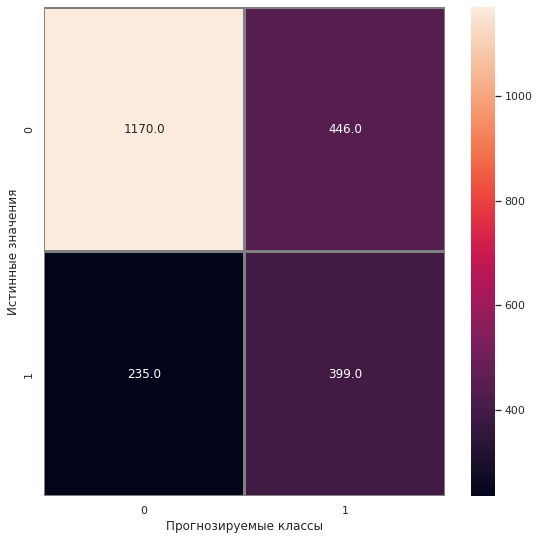

In [ ]:
lg_mat = confusion_matrix(test[target_col], y_lgreg)
plt.figure(figsize = (9,9))
sns.heatmap(data = lg_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

In [ ]:
# Аналогично обучим модель Логистической регрессии на наборе со сбалансированными классами
lg_reg = LogisticRegression(random_state= 42)

In [ ]:
lg_cv = GridSearchCV(lg_reg, param_grid = lg_param, scoring = 'f1_weighted')

In [ ]:
#lg_cv.fit(scaled_over_train, over_train[target_col])

In [ ]:
#lg_cv.best_params_

In [ ]:
#Обучим модель на лучших параметрах
lg_reg = lg_reg = LogisticRegression(random_state= 42, C = 0.6666666666666666, max_iter = 50 )

In [ ]:
lg_reg.fit(scaled_over_train, over_train[target_col])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.6666666666666666, max_iter=50, random_state=42)

In [ ]:
y_lgreg = lg_reg.predict(scaled_test)

In [ ]:
print(classification_report(test[target_col], y_lgreg))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1616
           1       0.51      0.56      0.54       634

    accuracy                           0.73      2250
   macro avg       0.67      0.68      0.67      2250
weighted avg       0.73      0.73      0.73      2250



Text(57.5, 0.5, 'Истинные значения')

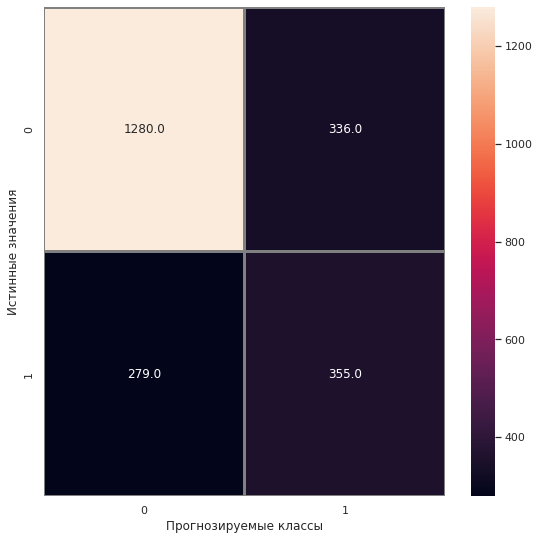

In [ ]:
# модель, обученная на данных со сбалансированными классами показала себя несколько лучше, результат по целевому классу - 0,54 F1-score
# точность определения целевого класса presision 51%, recall 56% 
lg_mat = confusion_matrix(test[target_col], y_lgreg)
plt.figure(figsize = (9,9))
sns.heatmap(data = lg_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

In [ ]:
# Модель преодолела целевой показатель для курсового проекта. Выполним предсказание по контрольному набору
y_lgreg_val = lg_reg.predict(scaled_val)

In [ ]:
type(y_lgreg_val)

numpy.ndarray

In [ ]:
attemp = pd.read_csv(submission_link)
attemp.head()

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [ ]:
#преобразуем в датафрейм
attemp[target_col] = y_lgreg_val
attemp

,Id,Credit Default
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
2495,2495,0
2496,2496,1
2497,2497,1
2498,2498,0


In [ ]:
# сохраняем в файл
attemp.to_csv('sv_smirnov_lgreg_balanced.csv', index = False, index_label= False)

### 5.2.2 Наивный байесовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB() 

In [ ]:
nb_params = {'var_smoothing': [1e-9, 1e-5, 1e-2, 0.1]}

In [ ]:
nb_cv = GridSearchCV(nb, param_grid= nb_params, scoring = 'f1_weighted')

In [ ]:
nb_cv.fit(scaled_train, train[target_col])

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.01, 0.1]},
             scoring='f1_weighted')

In [ ]:
nb_cv.best_params_

{'var_smoothing': 0.1}

In [ ]:
#обучим модель на наилучших параметрах
nb = GaussianNB(var_smoothing = 0.1) 
nb.fit(scaled_train, train[target_col])

GaussianNB(var_smoothing=0.1)

In [ ]:
y_nb = nb.predict(scaled_test)

In [ ]:
print(classification_report(test[target_col], y_nb))

              precision    recall  f1-score   support

           0       0.94      0.26      0.41      1616
           1       0.34      0.96      0.50       634

    accuracy                           0.46      2250
   macro avg       0.64      0.61      0.45      2250
weighted avg       0.77      0.46      0.43      2250



Text(57.5, 0.5, 'Истинные значения')

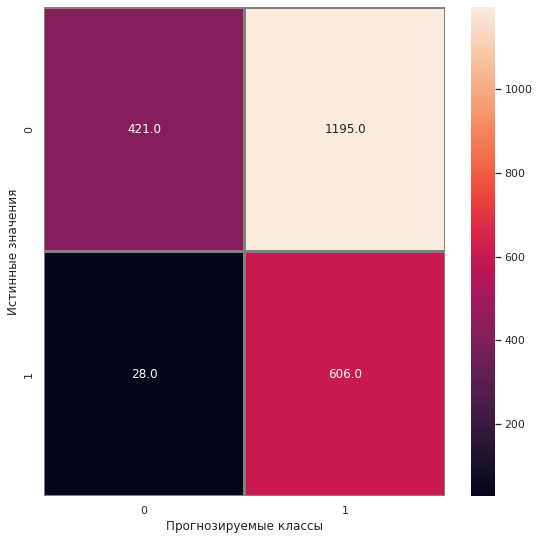

In [ ]:
p_mat = confusion_matrix(test[target_col], y_nb)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Байсовский классификатор показал довольно неплохой результат. Для целевого класа показатель recall составил 96%, хотя по метрике f1-score всего 50%, общая эффективност модели   46%. Данная модель может быть полезна если необходимо выявить всех потенциальных клиентов имеющих риск дефолта, при этом если издержки ложно-положительного результатата (признания рискованным хорошего клиента) незначительны. Наприер рекламная рассылка условий рефинансирования, снижения ставок, отсрочки платежей.

In [ ]:
# обучим на наборе со сбалансированными классами
nb = GaussianNB()

In [ ]:
nb_cv = GridSearchCV(nb, param_grid= nb_params, scoring = 'f1_weighted')

In [ ]:
nb_cv.fit(scaled_over_train, over_train[target_col])

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.01, 0.1]},
             scoring='f1_weighted')

In [ ]:
#nb_cv.best_params_

In [ ]:
#обучим на лучших параметрах 
nb = GaussianNB(var_smoothing = 0.1)
nb.fit(scaled_over_train, over_train[target_col])

GaussianNB(var_smoothing=0.1)

In [ ]:
y_nb = nb.predict(scaled_test)

In [ ]:
print(classification_report(test[target_col], y_nb))

              precision    recall  f1-score   support

           0       0.94      0.21      0.34      1616
           1       0.32      0.97      0.48       634

    accuracy                           0.42      2250
   macro avg       0.63      0.59      0.41      2250
weighted avg       0.77      0.42      0.38      2250



Text(57.5, 0.5, 'Истинные значения')

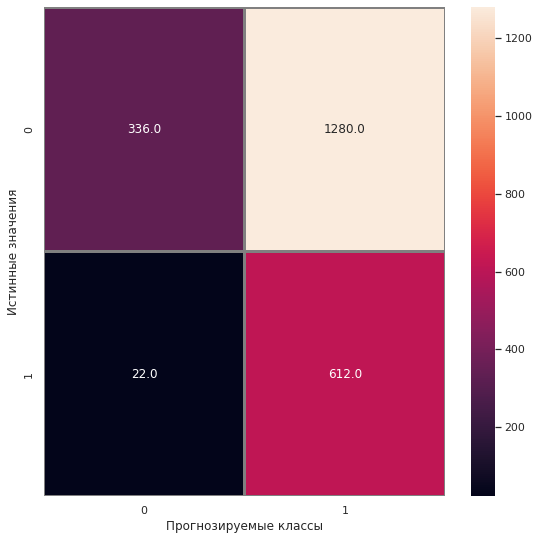

In [ ]:
p_mat = confusion_matrix(test[target_col], y_nb)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Качество модели не улучшилось f1-score по целевому классу составил лишь 48%

## 5.2. Модели градиентного бустинга

Рассмотрим три реализации (библиотеки) градиентного бустинга. Первая модель, строенная в пакет sklearn. Вторамя модель LightGBM - легковесного градиентного бустинга. Последней рассмотрим CatBoost - позволяющей подавать в модель данные с минимальной обработкой и "неоцифрованные" категориальные признаки.

### 5.2.1. Градиентный бустинг из sklearn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC

In [ ]:
cv_params = {'n_estimators':[i for i in range(5,55,5)],
             'max_depth': [2,3,5],
             'learning_rate': [0.1,3,5]}

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
cv_gbc = GridSearchCV(gbc, cv_params, scoring = 'f1_weighted')

In [ ]:
 #Обучим модель на немаштабированных числовых признаках
 #cv_gbc.fit(train[num_feats], train[target_col])

In [ ]:
# выведем лучшие параметры
#cv_gbc.best_params_

In [ ]:
# Натренируем модель на оптимальных параметрах {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 45}
gbc = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 5, n_estimators= 45)

In [ ]:
%%time 
gbc.fit(train[num_feats], train[target_col]) # сделаем замер времени

CPU times: user 1.12 s, sys: 1.77 ms, total: 1.12 s
Wall time: 1.14 s


GradientBoostingClassifier(max_depth=5, n_estimators=45)

In [ ]:
y_gbc = gbc.predict(test[num_feats])

In [ ]:
print(classification_report(test[target_col], y_gbc))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1616
           1       0.80      0.28      0.41       634

    accuracy                           0.78      2250
   macro avg       0.79      0.63      0.64      2250
weighted avg       0.78      0.78      0.74      2250



Text(60.0, 0.5, 'Истинные значения')

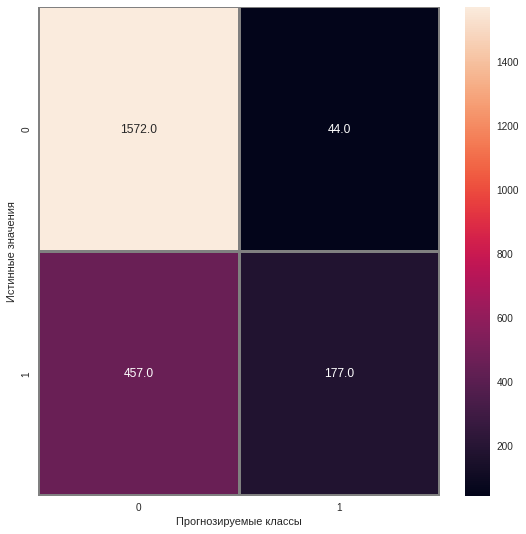

In [ ]:
p_mat = confusion_matrix(test[target_col], y_gbc)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Точность распознавания целевого класса составила 79% (preсision) и всего 28% по полноте (recall). В свою очередь F-score составил лишь 41%. За счет дисбаланса классов общая эффективность модели составила 78%

In [ ]:
# Обучим модель на тренировочном наборе с устраненным дисбалансом
gbc = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 5, n_estimators= 100)
gbc.fit(over_train[num_feats], over_train[target_col]) 

GradientBoostingClassifier(max_depth=5)

In [ ]:
y_gbc = gbc.predict(test[num_feats])

In [ ]:
print(classification_report(test[target_col], y_gbc))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1616
           1       0.73      0.34      0.46       634

    accuracy                           0.78      2250
   macro avg       0.76      0.64      0.66      2250
weighted avg       0.77      0.78      0.75      2250



Text(60.0, 0.5, 'Истинные значения')

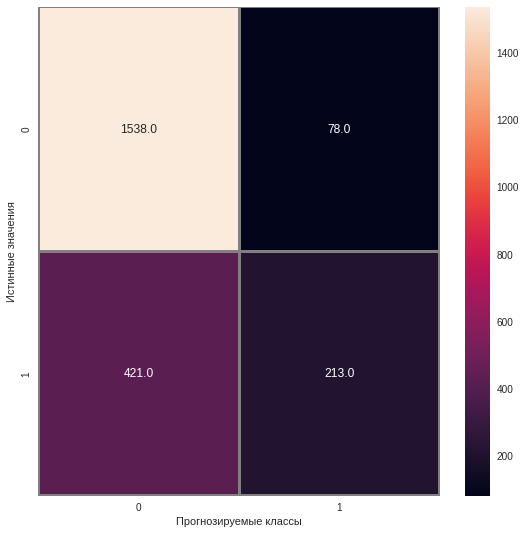

In [ ]:
p_mat = confusion_matrix(test[target_col], y_gbc)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Точность модели немного возрала, верно распознано 213 из 634 клиентов, F1-score составил 46% (+5%). При этом общая эффективность модели осталась 78%. Модель не достигла целевого показателя по полноте (recall) 34%.

### 5.2.2. Легкий бустинг

In [ ]:
# подключение библиотеки
from lightgbm import LGBMClassifier, plot_importance
#from lightgbm import train

In [ ]:
# параметры поиска по сетке
lgbm_param = {'num_leaves' : [2,5,7,31], 'max_depth' : [-1, 5, 10, 15], 'learning_rate' : [0.1, 0.3, 0.5, 0.8], 'reg_lambda' : [0.0, 0.5, 0.9, 1.1], 'n_estimators': [i for i in range(5,105,5)]}

In [ ]:
lgbmc = LGBMClassifier(class_weight = {0:1, 1: disbalance}) # укажем на дисбаланс классов 

In [ ]:
lgbmc_cv = GridSearchCV(estimator = lgbmc, param_grid= lgbm_param, scoring = 'f1_macro')

In [ ]:
#lgbmc_cv.fit(train[num_feats], train[target_col])

In [ ]:
#lgbmc_cv.best_params_

In [ ]:
# обучим на лучших параметрах
lgbmc = LGBMClassifier(learning_rate  = 0.1, max_depth= 5, num_leaves= 31, reg_lambda = 0.5, class_weight = {0:1, 1:disbalance}, n_estimators = 10) 

In [ ]:
%%time
lgbmc.fit(train[num_feats], train[target_col]) # также используем оцифрованные признаки

CPU times: user 61.1 ms, sys: 2.03 ms, total: 63.1 ms
Wall time: 46.1 ms


LGBMClassifier(class_weight={0: 1, 1: 2.549455750118315}, max_depth=5,
               n_estimators=10, reg_lambda=0.5)

In [ ]:
y_lgbmc = lgbmc.predict(test[num_feats])

In [ ]:
print(classification_report(test[target_col], y_lgbmc))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1616
           1       0.50      0.60      0.55       634

    accuracy                           0.72      2250
   macro avg       0.66      0.68      0.67      2250
weighted avg       0.74      0.72      0.73      2250



Text(60.0, 0.5, 'Истинные значения')

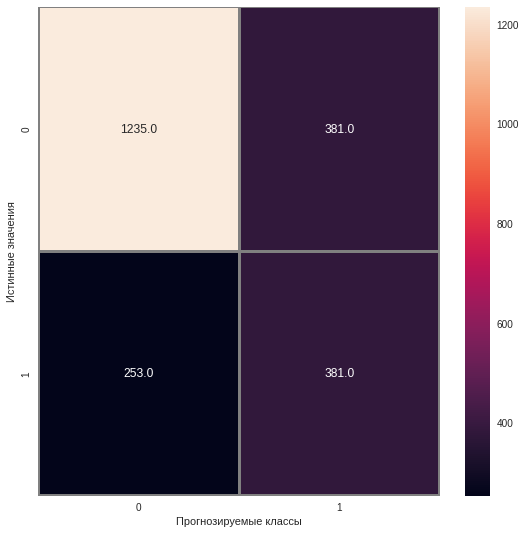

In [ ]:
p_mat = confusion_matrix(test[target_col], y_lgbmc)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Результаты применения модели  достигли минимальный уровень для курсового проекта F1-score по первому классу составил 55%. Точность распознавания составила 50 %, полнота 60%. Модель оказалась действительно более быстродействующей - почти в два раза быстрей модели бустинга в sklearn.

In [ ]:
# выполним предсказание по контрольным данным
y_lgbmc_val = lgbmc.predict(val_data[num_feats])

In [ ]:
#преобразуем в датафрейм
attemp[target_col] = y_lgbmc_val
attemp

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
2495,2495,0
2496,2496,0
2497,2497,0
2498,2498,0


In [ ]:
# сохраняем в файл
attemp.to_csv('sv_smirnov_lgbmc_unbalanced.csv', index = False, index_label= False)

In [ ]:
# Настрока порога вероятности отнесения к какому-либо класу
lgbmc = LGBMClassifier(learning_rate  = 0.1, max_depth= 5, num_leaves= 31, reg_lambda = 0.5, class_weight = {0:1, 1:disbalance}, n_estimators = 10) 
lgbmc.fit(train[num_feats], train[target_col]) # также используем оцифрованные признаки

LGBMClassifier(class_weight={0: 1, 1: 2.549455750118315}, max_depth=5,
               n_estimators=10, reg_lambda=0.5)

In [ ]:
y_predict_proba = lgbmc.predict_proba(train[num_feats])

In [ ]:
proba_data = pd.DataFrame(data = {'Proba': y_predict_proba[:,1], 'Y_pred' : np.zeros(train.shape[0]) }, index = train.index)
proba_data

,Proba,Y_pred
5030,0.600476,0.0
4776,0.485776,0.0
3792,0.579854,0.0
6101,0.509169,0.0
5880,0.410700,0.0
...,...,...
6200,0.485776,0.0
6037,0.420931,0.0
2602,0.180011,0.0
1796,0.471837,0.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def fit_proba(proba_data, y_true):
    p_lim = [i/100 for i in range(1,99,1)]
    y_pres, y_rec, y_f1 = [], [], []
    for pl in p_lim:
        proba_data['Y_pred'].loc[proba_data['Proba'] >= pl] = 1
        proba_data['Y_pred'].loc[proba_data['Proba'] < pl] = 0
              
        y_pres.append(precision_score(y_true, proba_data.Y_pred))
        y_rec.append(recall_score(y_true, proba_data.Y_pred))
        y_f1.append(f1_score(y_true, proba_data.Y_pred))
       
    return pd.DataFrame(data = {'Y_pres': y_pres, 'Y_recall': y_rec, 'Y_f1': y_f1, 'Proba_limit': p_lim})


In [ ]:
train_score = fit_proba(proba_data, train[target_col])

In [ ]:
train_score

,Y_pres,Y_recall,Y_f1,Proba_limit
0,0.281714,1.0,0.43959,0.01
1,0.281714,1.0,0.43959,0.02
2,0.281714,1.0,0.43959,0.03
3,0.281714,1.0,0.43959,0.04
4,0.281714,1.0,0.43959,0.05
...,...,...,...,...
93,0.000000,0.0,0.00000,0.94
94,0.000000,0.0,0.00000,0.95
95,0.000000,0.0,0.00000,0.96
96,0.000000,0.0,0.00000,0.97


Text(0.5, 1.0, 'Порог вероятностей на этапе обучения')

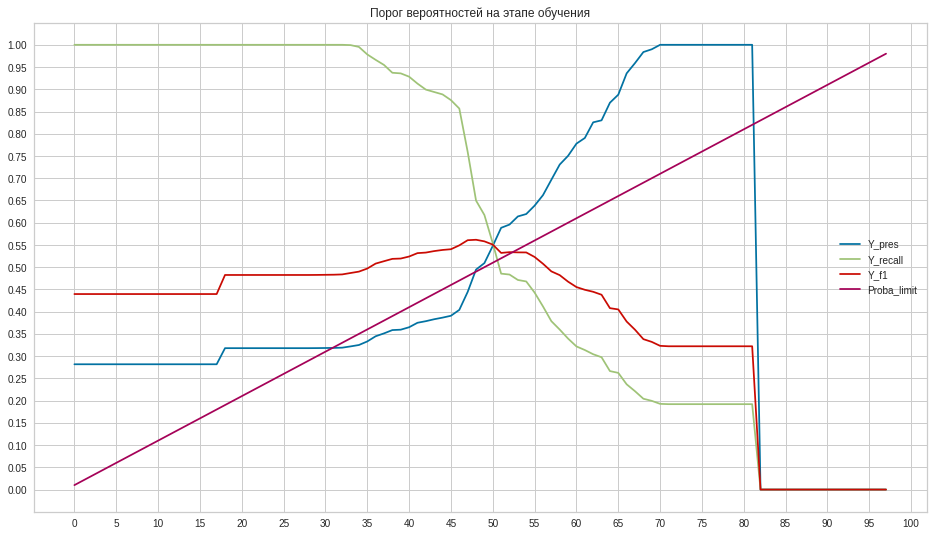

In [ ]:
train_score.plot(figsize = (16,9))
plt.yticks([i/100 for i in range(0,105,5)])
plt.xticks([i for i in range(0,105,5)])
plt.title('Порог вероятностей на этапе обучения')


In [ ]:
# Вероятности на контрольном наборе
y_predict_proba2 = lgbmc.predict_proba(test[num_feats])

In [ ]:
proba_data2 = pd.DataFrame(data = {'Proba': y_predict_proba2[:,1], 'Y_pred' : np.zeros(test.shape[0]) }, index = test.index)

In [ ]:
test_score = fit_proba(proba_data2, test[target_col])

Text(0.5, 1.0, 'Порог вероятностей на этапе проверки')

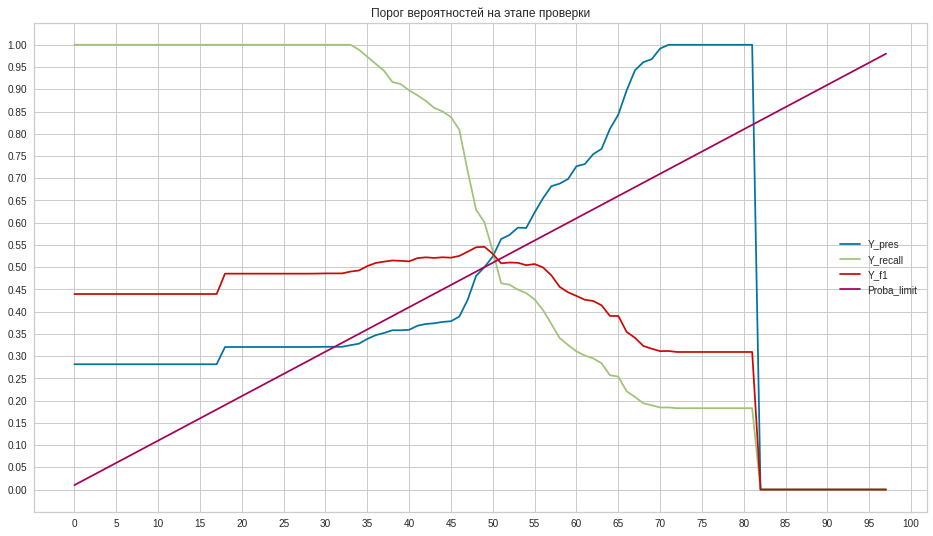

In [ ]:
test_score.plot(figsize = (16,9))
plt.yticks([i/100 for i in range(0,105,5)])
plt.xticks([i for i in range(0,105,5)])
plt.title('Порог вероятностей на этапе проверки')

In [ ]:
test_score.loc[50]

Y_pres         0.523883
Y_recall       0.536278
Y_f1           0.530008
Proba_limit    0.510000
Name: 50, dtype: float64

In [ ]:
# Оптимум достигается при пороге в 51% или 0.51
proba_data2.Y_pred.loc[proba_data2.Proba >=51/100] = 1

In [ ]:
print(classification_report(test[target_col], proba_data2.Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1616
           1       0.52      0.54      0.53       634

    accuracy                           0.73      2250
   macro avg       0.67      0.67      0.67      2250
weighted avg       0.73      0.73      0.73      2250



In [ ]:
# обучим модель на сбалансированной выборке
lgbmc = LGBMClassifier()

In [ ]:
lgbmc_cv = GridSearchCV(estimator = lgbmc, param_grid= lgbm_param, scoring = 'f1_macro')

In [ ]:
#lgbmc_cv.fit(over_train[num_feats], over_train[target_col])

In [ ]:
#lgbmc_cv.best_params_

In [ ]:
# обучим модель на оптимальных параметрах 'learning_rate': 0.3,  'max_depth': 10, 'n_estimators': 85, 'num_leaves': 31,  'reg_lambda': 1.1
lgbmc = LGBMClassifier(learning_rate  = 0.3, max_depth= 10, num_leaves= 31, reg_lambda = 1.1, n_estimators = 85, class_weight = {0:1, 1:disbalance})
lgbmc.fit(over_train[num_feats], over_train[target_col])

LGBMClassifier(class_weight={0: 1, 1: 2.549455750118315}, learning_rate=0.3,
               max_depth=10, n_estimators=85, reg_lambda=1.1)

In [ ]:
y_lgbmc = lgbmc.predict(test[num_feats])

In [ ]:
print(classification_report(test[target_col], y_lgbmc))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1616
           1       0.49      0.50      0.49       634

    accuracy                           0.71      2250
   macro avg       0.64      0.65      0.65      2250
weighted avg       0.71      0.71      0.71      2250



Text(60.0, 0.5, 'Истинные значения')

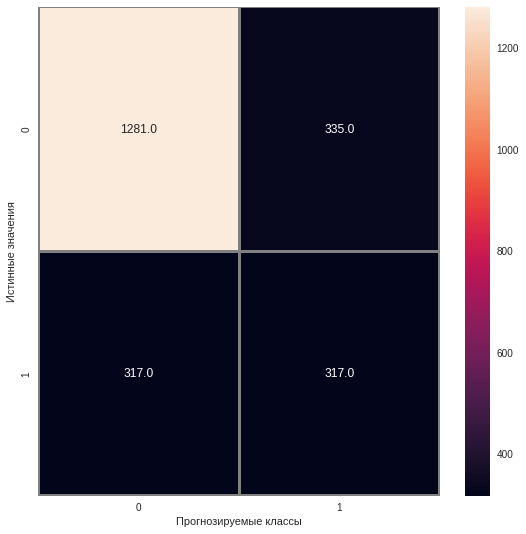

In [ ]:
p_mat = confusion_matrix(test[target_col], y_lgbmc)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Результаты модели оказались довольно близкими. Для оптимизации модели, проанализируем важность признаков

In [ ]:
feats = pd.DataFrame(data = {'Feature': num_feats, 'Imp':lgbmc.feature_importances_}, columns = ['Feature', 'Imp'])


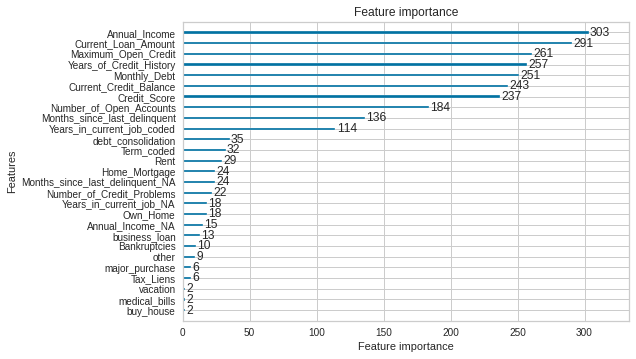

In [ ]:
plot_importance(lgbmc)

In [ ]:
feats.sort_values('Imp', ascending = False)

,Feature,Imp
0,Annual Income,303
8,Current Loan Amount,291
4,Maximum Open Credit,261
3,Years of Credit History,257
10,Monthly Debt,251
9,Current Credit Balance,243
11,Credit Score,237
2,Number of Open Accounts,184
6,Months since last delinquent,136
21,Years_in_current_job_coded,114


Анализ показал что ряд признаков не участвовли в деревьях решений (имеют важность 0). Ряд признаков имеют резко выраженное влияние на результат, начиная с признака "Years_in_current_job_coded" - 114 вхождений. <br>
Обучим моедель сперва без значимых признаков, потом на наиболее значимых


In [ ]:
imp_cols = feats.Feature.loc[feats.Imp > 0].tolist() # без признаков с 0 рейтингом
len(imp_cols)

27

In [ ]:
#Средний рейтинг признаков
feats.Imp.median()

18.0

In [ ]:
major_cols = feats.Feature.loc[feats.Imp >= feats.Imp.mean()].tolist() # начиная с рейтинга среднего и выше
len(major_cols)

10

In [ ]:
%%time
lgbmc = LGBMClassifier(learning_rate  = 0.3, max_depth= 10, num_leaves= 31, reg_lambda = 1.1, n_estimators = 85, class_weight = {0:1, 1:disbalance})
lgbmc.fit(train[imp_cols], train[target_col])

CPU times: user 327 ms, sys: 11.9 ms, total: 339 ms
Wall time: 181 ms


In [ ]:
y_lgbmc = lgbmc.predict(test[imp_cols])

In [ ]:
print(classification_report(test[target_col], y_lgbmc))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1616
           1       0.51      0.48      0.50       634

    accuracy                           0.72      2250
   macro avg       0.65      0.65      0.65      2250
weighted avg       0.72      0.72      0.72      2250



In [ ]:
%%time
# на наиболее важных признаках
lgbmc = LGBMClassifier(learning_rate  = 0.3, max_depth= 10, num_leaves= 31, reg_lambda = 1.1, n_estimators = 85, class_weight = {0:1, 1:disbalance})
lgbmc.fit(train[major_cols], train[target_col])

CPU times: user 270 ms, sys: 10 ms, total: 280 ms
Wall time: 147 ms


In [ ]:
y_lgbmc = lgbmc.predict(test[major_cols])

In [ ]:
print(classification_report(test[target_col], y_lgbmc))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1616
           1       0.52      0.50      0.51       634

    accuracy                           0.73      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250



Исключение признаков даже  с минимальной значимостью к ухудьшению качества модели

### 5.2.3. Категориальный градиентный бустинг

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.4 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_boost = CatBoostClassifier(cat_features= cat_cols, class_weights= [1, disbalance], silent = True )

In [ ]:
all_feats = list((*cat_cols, *num_cols)) # объединяем исходные колонки с категориальными и численными признаками
all_feats

['Home Ownership',
 'Years in current job',
 'Purpose',
 'Term',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [ ]:
cb_params = {'n_estimators': [i for i in range(5,250,10)],
             'l2_leaf_reg': [0.1, 1, 3, 5]}

In [ ]:
cat_boost.grid_search(cb_params, train[all_feats], train[target_col], stratified = True)


bestTest = 0.6183675991
bestIteration = 4

0:	loss: 0.6183676	best: 0.6183676 (0)	total: 101ms	remaining: 9.98s

bestTest = 0.6268600838
bestIteration = 4

1:	loss: 0.6268601	best: 0.6183676 (0)	total: 145ms	remaining: 7.12s

bestTest = 0.6334290964
bestIteration = 4

2:	loss: 0.6334291	best: 0.6183676 (0)	total: 181ms	remaining: 5.86s

bestTest = 0.6368116532
bestIteration = 4

3:	loss: 0.6368117	best: 0.6183676 (0)	total: 218ms	remaining: 5.22s

bestTest = 0.5745809252
bestIteration = 14

4:	loss: 0.5745809	best: 0.5745809 (4)	total: 322ms	remaining: 6.11s

bestTest = 0.5826964851
bestIteration = 14

5:	loss: 0.5826965	best: 0.5745809 (4)	total: 417ms	remaining: 6.54s

bestTest = 0.5859328591
bestIteration = 14

6:	loss: 0.5859329	best: 0.5745809 (4)	total: 515ms	remaining: 6.84s

bestTest = 0.5888117369
bestIteration = 14

7:	loss: 0.5888117	best: 0.5745809 (4)	total: 615ms	remaining: 7.08s

bestTest = 0.5646140035
bestIteration = 24

8:	loss: 0.5646140	best: 0.5646140 (8)	total: 7

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
# 'params': {'iterations': 195, 'l2_leaf_reg': 0.1}}

In [ ]:

#cat_boost = CatBoostClassifier(iterations =  195, l2_leaf_reg = 0.1,cat_features= cat_cols, silent = True )

In [ ]:
#cat_boost.fit(train[all_feats], train[target_col], cat_features= cat_cols, silent = True)

In [ ]:
y_cat = cat_boost.predict(test[all_feats])

In [ ]:
print(classification_report(test[target_col], y_cat))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1616
           1       0.51      0.57      0.53       634

    accuracy                           0.72      2250
   macro avg       0.66      0.68      0.67      2250
weighted avg       0.73      0.72      0.73      2250



Text(60.0, 0.5, 'Истинные значения')

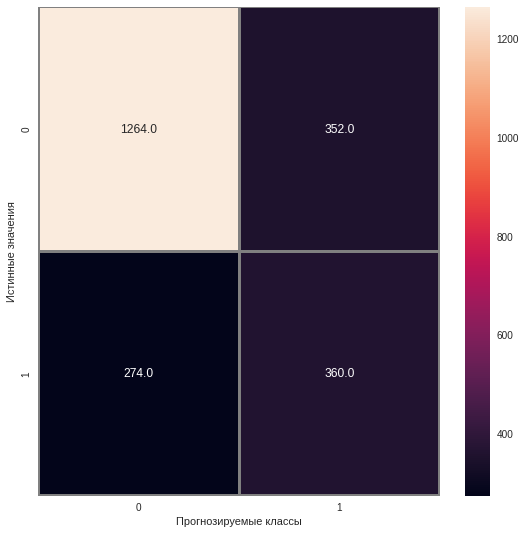

In [ ]:
p_mat = confusion_matrix(test[target_col], y_cat)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

In [ ]:
# модель преодолела порог эфффективности выполним предсказания на контрольных данных
y_cat_val = cat_boost.predict(val_data[all_feats])

In [ ]:
attemp[target_col] = y_cat_val
attemp

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
2495,2495,0
2496,2496,0
2497,2497,0
2498,2498,0


In [ ]:
# сохраняем в файл
attemp.to_csv('sv_smirnov_catboost_cat_unbalanced.csv', index = False, index_label= False)

In [ ]:
# Проверим работу алгоритма на количественных признаках 
cat_boost = CatBoostClassifier(class_weights= [1, disbalance], silent = True)

In [ ]:
cb_params = { 'iterations' : [i for i in range(170,250,1)],
             'l2_leaf_reg': [0.1, 1, 3, 5]}

In [ ]:
cat_boost.grid_search(cb_params, train[num_feats], train[target_col], stratified = True )


bestTest = 0.5487400398
bestIteration = 102

0:	loss: 0.5487400	best: 0.5487400 (0)	total: 680ms	remaining: 3m 37s

bestTest = 0.5472986344
bestIteration = 167

1:	loss: 0.5472986	best: 0.5472986 (1)	total: 1.32s	remaining: 3m 30s

bestTest = 0.5469220653
bestIteration = 157

2:	loss: 0.5469221	best: 0.5469221 (2)	total: 1.98s	remaining: 3m 28s

bestTest = 0.5489519693
bestIteration = 166

3:	loss: 0.5489520	best: 0.5469221 (2)	total: 2.61s	remaining: 3m 26s

bestTest = 0.5487400398
bestIteration = 102

4:	loss: 0.5487400	best: 0.5469221 (2)	total: 3.23s	remaining: 3m 23s

bestTest = 0.5472986344
bestIteration = 167

5:	loss: 0.5472986	best: 0.5469221 (2)	total: 3.87s	remaining: 3m 22s

bestTest = 0.5469220653
bestIteration = 157

6:	loss: 0.5469221	best: 0.5469221 (2)	total: 4.53s	remaining: 3m 22s

bestTest = 0.5489399876
bestIteration = 170

7:	loss: 0.5489400	best: 0.5469221 (2)	total: 5.16s	remaining: 3m 21s

bestTest = 0.5487400398
bestIteration = 102

8:	loss: 0.5487400	best: 0

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
# оптимальные параметры 'params': {'iterations': 188, 'l2_leaf_reg': 3}}
y_cat = cat_boost.predict(test[num_feats])

In [ ]:
print(classification_report(test[target_col], y_cat))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1616
           1       0.49      0.58      0.53       634

    accuracy                           0.71      2250
   macro avg       0.66      0.67      0.66      2250
weighted avg       0.73      0.71      0.72      2250



Text(60.0, 0.5, 'Истинные значения')

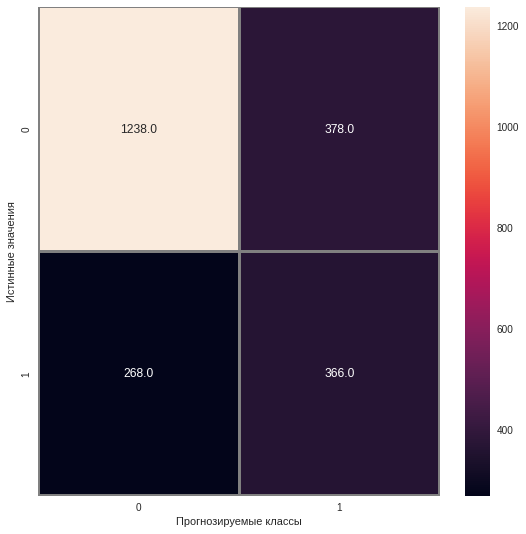

In [ ]:
p_mat = confusion_matrix(test[target_col], y_cat)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

In [ ]:
# обучение на сбалансированной выборке
cat_boost = CatBoostClassifier( silent= True)

In [ ]:
cb_params = { 'iterations' : [i for i in range(170,250,1)],
             'l2_leaf_reg': [0.1, 1, 3, 5]}

In [ ]:
cat_boost.grid_search(cb_params, over_train[num_feats], over_train[target_col], stratified = True )


bestTest = 0.3714235976
bestIteration = 165

0:	loss: 0.3714236	best: 0.3714236 (0)	total: 1.41s	remaining: 7m 29s

bestTest = 0.3779434651
bestIteration = 168

1:	loss: 0.3779435	best: 0.3714236 (0)	total: 2.75s	remaining: 7m 17s

bestTest = 0.3798673007
bestIteration = 168

2:	loss: 0.3798673	best: 0.3714236 (0)	total: 4.07s	remaining: 7m 10s

bestTest = 0.3822217098
bestIteration = 168

3:	loss: 0.3822217	best: 0.3714236 (0)	total: 5.41s	remaining: 7m 7s

bestTest = 0.3713509332
bestIteration = 170

4:	loss: 0.3713509	best: 0.3713509 (4)	total: 6.75s	remaining: 7m 4s

bestTest = 0.3779434651
bestIteration = 168

5:	loss: 0.3779435	best: 0.3713509 (4)	total: 8.07s	remaining: 7m 2s

bestTest = 0.3798673007
bestIteration = 168

6:	loss: 0.3798673	best: 0.3713509 (4)	total: 9.39s	remaining: 6m 59s

bestTest = 0.3822217098
bestIteration = 168

7:	loss: 0.3822217	best: 0.3713509 (4)	total: 10.7s	remaining: 6m 57s

bestTest = 0.3713509332
bestIteration = 170

8:	loss: 0.3713509	best: 0.37

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
# оптимальные параметры  'params': {'iterations': 249, 'l2_leaf_reg': 0.1}}
y_cat = cat_boost.predict(test[num_feats])

In [ ]:
print(classification_report(test[target_col], y_cat))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1616
           1       0.77      0.29      0.43       634

    accuracy                           0.78      2250
   macro avg       0.77      0.63      0.64      2250
weighted avg       0.77      0.78      0.74      2250



Text(60.0, 0.5, 'Истинные значения')

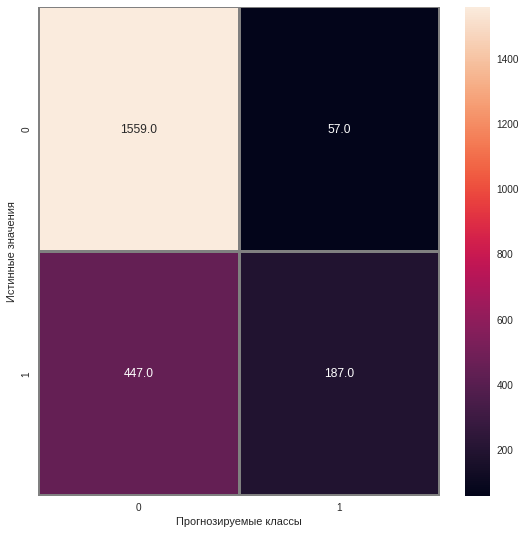

In [ ]:
p_mat = confusion_matrix(test[target_col], y_cat)
plt.figure(figsize = (9,9))
sns.heatmap(data = p_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')

Наилучший результат модель достигла на сбалансированном обучаещем наборе. Параметр F1-score  по целевому классу достиг 43%. Значение по полноте (recall) ниже целевого  29% (50%)

In [ ]:
# Осуществим классификацию по контрольному набору данных
y_catboost_val = cat_boost.predict(val_data[num_feats])

In [ ]:
#преобразуем в датафрейм
attemp[target_col] = y_catboost_val
attemp.head()

,Id,Credit Default
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [ ]:
#attemp.to_csv('sv_smirnov_catboost_balanced.csv', index = False, index_label= False)

In [ ]:
y_cat_proba = cat_boost.predict_proba(test[num_feats])

In [ ]:
proba_data_cat = pd.DataFrame(data = {'Proba': y_cat_proba[:,1], 'Y_pred' : np.zeros(test.shape[0]) }, index = test.index)
proba_data_cat

,Proba,Y_pred
4005,0.290996,0.0
1526,0.353865,0.0
5910,0.278700,0.0
6374,0.031477,0.0
5588,0.259187,0.0
...,...,...
7134,0.206568,0.0
1942,0.386102,0.0
5810,0.994740,0.0
4169,0.192875,0.0


In [ ]:
test_cat_score = fit_proba(proba_data_cat, test[target_col])

Text(0.5, 1.0, 'Порог вероятностей на этапе проверки')

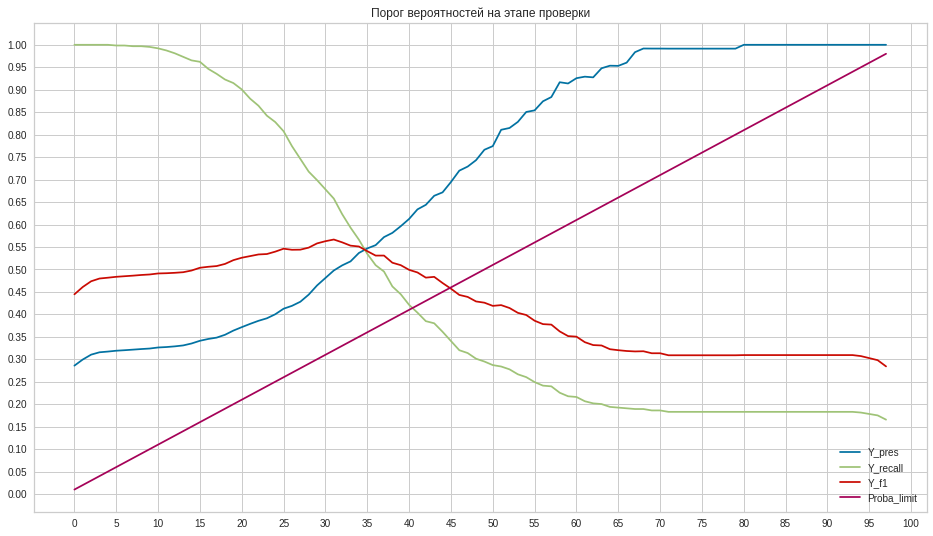

In [ ]:
test_cat_score.plot(figsize = (16,9))
plt.yticks([i/100 for i in range(0,105,5)])
plt.xticks([i for i in range(0,105,5)])
plt.title('Порог вероятностей на этапе проверки')

In [ ]:
test_cat_score.loc[30:40]

,Y_pres,Y_recall,Y_f1,Proba_limit
30,0.480984,0.678233,0.562827,0.31
31,0.497613,0.657729,0.566576,0.32
32,0.509021,0.623028,0.560284,0.33
33,0.517906,0.593060,0.552941,0.34
34,0.536622,0.566246,0.551036,0.35
35,0.546774,0.534700,0.540670,0.36
36,0.554031,0.509464,0.530813,0.37
37,0.571949,0.495268,0.530854,0.38
38,0.581349,0.462145,0.514938,0.39
39,0.596195,0.444795,0.509485,0.40


In [ ]:
# Максимальное значение f1_score модель достигает при пороге 0,32 или 32%
proba_data_cat.Y_pred.loc[proba_data_cat.Proba >=0.32] = 1

In [ ]:
# Оценим результат
print(classification_report(test[target_col], proba_data_cat.Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1616
           1       0.50      0.66      0.57       634

    accuracy                           0.72      2250
   macro avg       0.67      0.70      0.68      2250
weighted avg       0.75      0.72      0.73      2250



In [ ]:
# сделаем предсказание оп контрольному набору
y_val_proba = cat_boost.predict_proba(val_data[num_feats])

In [ ]:
proba_data_val = pd.DataFrame(data = {'Proba': y_val_proba[:,1], 'Y_pred' : np.zeros(val_data.shape[0]) }, index = val_data.index)
proba_data_val

,Proba,Y_pred
0,0.453020,0.0
1,0.498027,0.0
2,0.989974,0.0
3,0.174174,0.0
4,0.252320,0.0
...,...,...
2495,0.012718,0.0
2496,0.385290,0.0
2497,0.304983,0.0
2498,0.247829,0.0


In [ ]:
# Выполним предсказание по заданному порогу
proba_data_val.Y_pred.loc[proba_data_val.Proba >=0.32] = 1

In [ ]:
#преобразуем в датафрейм
attemp[target_col] = proba_data_val.Y_pred.astype('int64')
attemp.head()

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


In [ ]:
attemp.to_csv('sv_smirnov_catboost_proba_limit.csv', index = False, index_label= False)

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
feats = pd.DataFrame(data = {'Imp':cat_boost.feature_importances_, 'Features': cat_boost.feature_names_,}, columns = ['Features', 'Imp'])

In [ ]:
feats = feats.sort_values('Imp', ascending= False)

<Figure size 648x432 with 0 Axes>

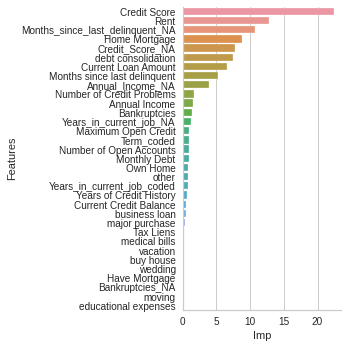

In [ ]:
plt.figure(figsize = (9,6))
sns.catplot(data = feats, x = 'Imp', y = 'Features', kind ='bar')
plt.show()

## 6.1. Однослойная нейронная сеть

Довольно неплохой результат Логистической регрессии на сбалансированном наборе данных натолкнул на мысль прменить однослойную нейронную сеть с функцией активации 'logistic'. Данная сеть будет похожа на ансамбль логистических регрессоров

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlpc = MLPClassifier(random_state = 42, activation = 'logistic', solver = 'sgd', max_iter = 500)

In [ ]:
ml_param = {'hidden_layer_sizes': [(20,), (30,),(40,)], 'alpha': [0.0001, 0.0003, 0.0005]}

In [ ]:
ml_cv = GridSearchCV(estimator = mlpc, param_grid = ml_param, scoring= 'f1_weighted')

In [ ]:
#ml_cv.fit(scaled_over_train, over_train[target_col])

In [ ]:
#ml_cv.best_params_

In [ ]:
# обучим на лучших параметрах
mlpc = MLPClassifier(alpha = 0.0001, hidden_layer_sizes= (30,), random_state = 42, activation = 'logistic', solver = 'sgd', max_iter = 500)

In [ ]:
mlpc.fit(scaled_over_train, over_train[target_col])

MLPClassifier(activation='logistic', hidden_layer_sizes=(30,), max_iter=500,
              random_state=42, solver='sgd')

In [ ]:
y_mlpc = mlpc.predict(scaled_test)

In [ ]:
print(classification_report(test[target_col], y_mlpc))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1616
           1       0.49      0.55      0.52       634

    accuracy                           0.71      2250
   macro avg       0.65      0.66      0.66      2250
weighted avg       0.72      0.71      0.72      2250



Text(60.0, 0.5, 'Истинные значения')

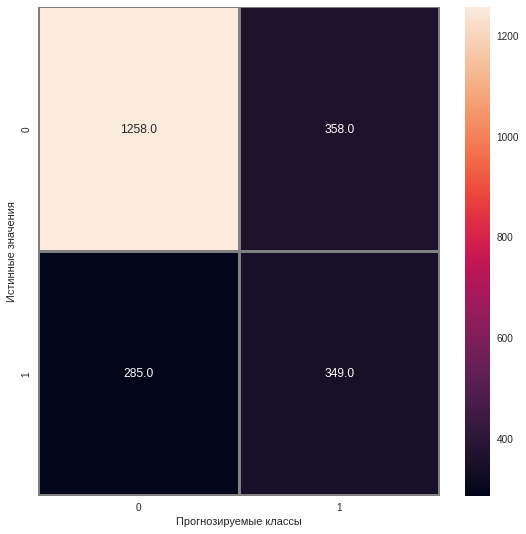

In [ ]:
lg_mat = confusion_matrix(test[target_col], y_mlpc)
plt.figure(figsize = (9,9))
sns.heatmap(data = lg_mat, annot=True, linewidths= 2, linecolor = 'grey', fmt = '.1f')
plt.xlabel('Прогнозируемые классы')
plt.ylabel('Истинные значения')